In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial
from scipy import stats
import warnings

warnings.simplefilter('ignore')

%matplotlib inline

In [0]:
def gen_evaluation_by_n(N, data, callback):
    return np.fromiter(
      map(callback, np.arange(0, N, 1)),
      dtype=np.float64
    )

# Первое задание

(К теоретической задаче 1) \\
Сгенерируйте выборку $X_1, ..., X_N$ из равномерного распределения
на отрезке $[0, \theta]$ для $N = 10^4.$ Для всех $n\leq N$
посчитайте оценки параметра $\theta$ из теоретической задачи:
$2\overline{X},$ $\overline{X} + X_{(n)}/2,$ $(n + 1)X_{(1)},$
$X_{(1)} + X_{(n)},$ $\frac{n+1}{n}X_{(n)}.$ Постройте на одном
графике разными цветами для всех оценок функции модуля разности
оценки и истинного значения $\theta$ в зависимости от $n.$ Если
некоторые оценки (при фиксированном значении $n$) сильно отличаются
от истинного значения параметра $\theta,$ то исключите их и
постройте еще один график со всеми кривыми (для измененного
значения $\theta$). Для избавления от больших значений разности в
начале ограничьте масштаб графика. Для наглядности точки можно
соединить линиями. Какая оценка получилась лучше (в смысле
упомянутого модуля разности при $n = N$)? Проведите эксперимент для
разных значений $\theta$ (количество графиков равно количеству
значений $\theta$).

In [0]:
N, THETA = 10**4, 1

Сгенерируем выборку из равномерного распределения на отрезке $[0; \theta]$ и найдем по ней порядковые статистики:

In [0]:
observations = stats.uniform.rvs(size=N, loc=0, scale=THETA)

### Посчитаем оценки параметра

*   $2\overline{X}$

In [0]:
double_mean = gen_evaluation_by_n(
    N, observations, lambda n: 2*observations[:n+1].mean())

*   $\overline{X} + X_{(n)}/2$

In [0]:
mean_plus_last = gen_evaluation_by_n(
    N, observations, lambda n: observations[:n+1].mean() + observations[:n+1].max()/2.0)


*   $(n + 1)X_{(1)}$

In [0]:
multi_first = gen_evaluation_by_n(
    N, observations, lambda n: (n+2) * observations[:n+1].min())

*   $X_{(1)} + X_{(n)}$

In [0]:
first_plus_last = gen_evaluation_by_n(
    N, observations, lambda n: observations[:n+1].min() + observations[:n+1].max())

*   $\frac{n + 1}{n}X_{(n)}$

In [0]:
frac_last = gen_evaluation_by_n(
    N, observations, lambda n: (n+2.)/(n+1.) * observations[:n+1].max())

### Посчитаем разности

In [0]:
def get_abs_diff(param_estimation, param=THETA):
    return np.abs(param_estimation - param)
  
  
abs_diff_double_mean     = get_abs_diff(double_mean)
abs_diff_mean_plus_last  = get_abs_diff(mean_plus_last)
abs_diff_multi_first     = get_abs_diff(multi_first)
abs_diff_first_plus_last = get_abs_diff(first_plus_last)
abs_diff_frac_last       = get_abs_diff(frac_last)

### Построим график

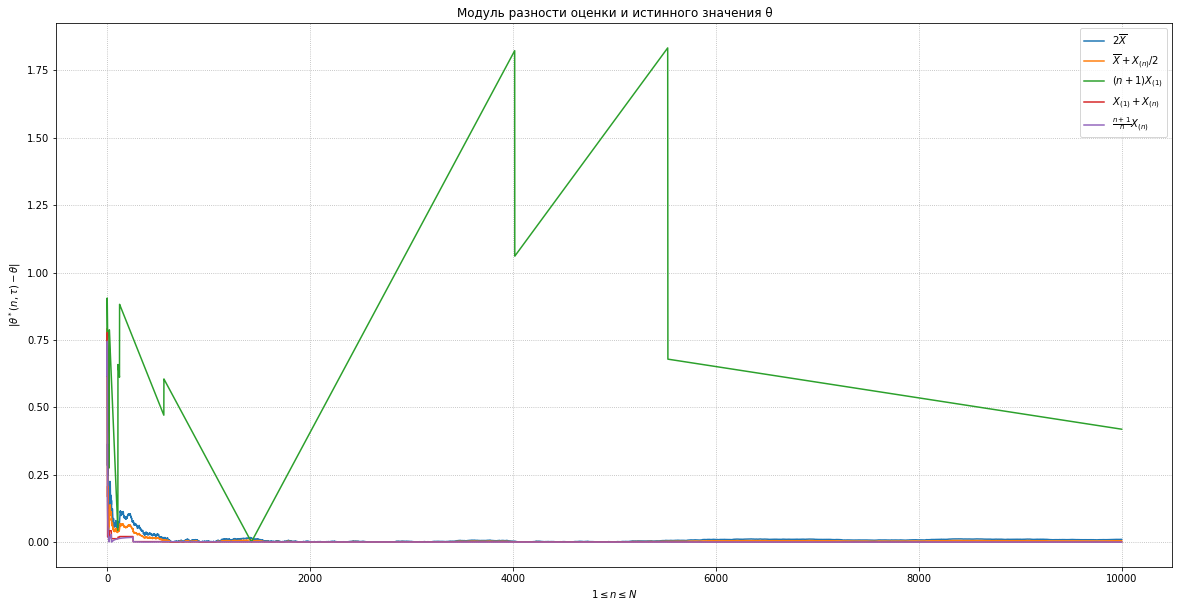

In [11]:
plt.figure(figsize=(20, 10))
plt.title("Модуль разности оценки и истинного значения θ")
plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$|θ^*(n, \\tau) - θ|$')
plt.plot(
  np.linspace(0, N, N),
  abs_diff_double_mean,
  label='$2\overline{X}$'
)
plt.plot(
  np.linspace(0, N, N),
  abs_diff_mean_plus_last,
  label='$\overline{X} + X_{(n)}/2$'
)
plt.plot(
  np.linspace(0, N, N),
  abs_diff_multi_first,
  label='$(n + 1)X_{(1)}$'
)
plt.plot(
  np.linspace(0, N, N),
  abs_diff_first_plus_last,
  label='$X_{(1)} + X_{(n)}$'
)
plt.plot(
  np.linspace(0, N, N),
  abs_diff_frac_last,
  label='$\\frac{n + 1}{n}X_{(n)}$'
)
plt.grid(ls=':')
plt.legend()
plt.show()

Оценка $(n + 1)X_{(1)}$ является несостоятельной, что и объясняет расходимость графика относительно оси абцисс.  
Подробнее рассмотрим поведение остальных оценок.

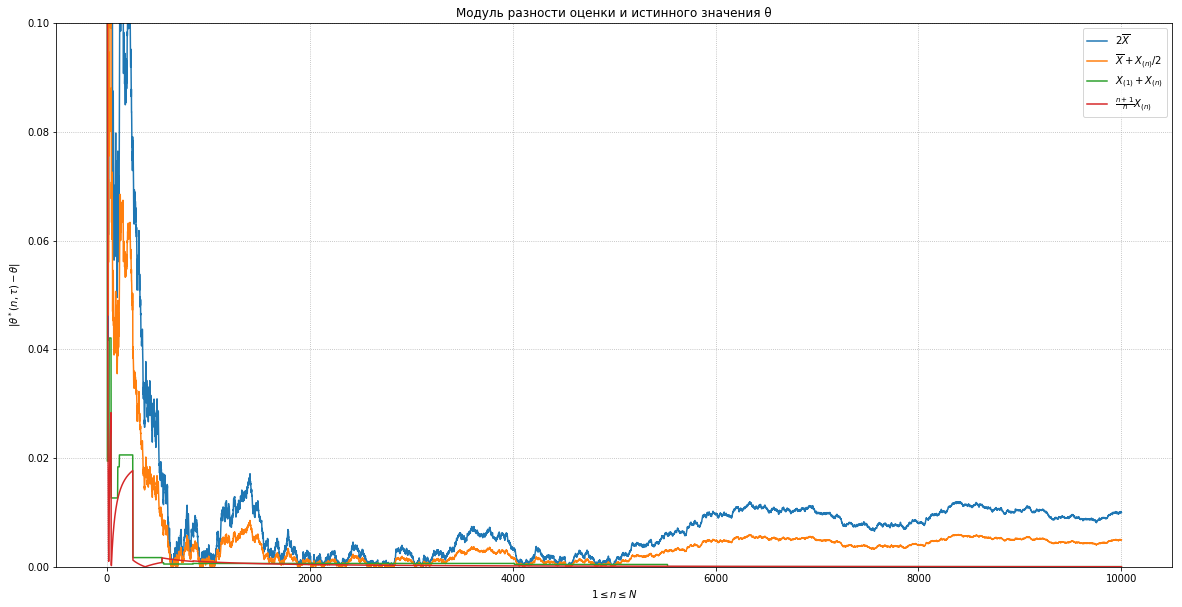

In [12]:
plt.figure(figsize=(20, 10))
plt.title("Модуль разности оценки и истинного значения θ")
plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$|θ^*(n, \\tau) - θ|$')
plt.ylim((.0, .1))
plt.plot(
  np.linspace(0, N, N),
  abs_diff_double_mean,
  label='$2\overline{X}$'
)
plt.plot(
  np.linspace(0, N, N),
  abs_diff_mean_plus_last,
  label='$\overline{X} + X_{(n)}/2$'
)
plt.plot(
  np.linspace(0, N, N),
  abs_diff_first_plus_last,
  label='$X_{(1)} + X_{(n)}$'
)
plt.plot(
  np.linspace(0, N, N),
  abs_diff_frac_last,
  label='$\\frac{n + 1}{n}X_{(n)}$'
)
plt.grid(ls=':')
plt.legend()
plt.show()

### Проведём эксперименты для разных значений $\theta$

Напишем функцию для генерации выборки и построения графиков. \\
Избавимся от больших значений разности в начале ограничим масштаб графика  $\frac{\theta}{20}$. \\
#### Disclaimer: много строк кода

In [0]:
def investigate(theta):
    observations = stats.uniform.rvs(size=N, loc=0, scale=theta)
    double_mean = gen_evaluation_by_n(
      N, observations, lambda n: 2*observations[:n+1].mean())
    mean_plus_last = gen_evaluation_by_n(
      N, observations, lambda n: observations[:n+1].mean() + observations[:n+1].max()/2.0)
    multi_first = gen_evaluation_by_n(
      N, observations, lambda n: (n+2) * observations[:n+1].min())
    first_plus_last = gen_evaluation_by_n(
      N, observations, lambda n: observations[:n+1].min() + observations[:n+1].max())
    frac_last = gen_evaluation_by_n(
      N, observations, lambda n: (n+2.)/(n+1.) * observations[:n+1].max())
    abs_diff_double_mean     = get_abs_diff(double_mean, theta)
    abs_diff_mean_plus_last  = get_abs_diff(mean_plus_last, theta)
    abs_diff_multi_first     = get_abs_diff(multi_first, theta)
    abs_diff_first_plus_last = get_abs_diff(first_plus_last, theta)
    abs_diff_frac_last       = get_abs_diff(frac_last, theta)
    plt.figure(figsize=(20, 10))
    plt.title("Модуль разности оценки и истинного значения θ=%.2f" % theta)
    plt.xlabel('$1\leq n \leq N$')
    plt.ylabel('$|θ^*(n, \\tau) - θ|$')
    plt.ylim((.0, .05*theta))
    plt.plot(
      np.linspace(0, N, N),
      abs_diff_double_mean,
      label='$2\overline{X}$'
    )
    plt.plot(
      np.linspace(0, N, N),
      abs_diff_mean_plus_last,
      label='$\overline{X} + X_{(n)}/2$'
    )
    plt.plot(
      np.linspace(0, N, N),
      abs_diff_multi_first,
      label='$(n + 1)X_{(1)}$'
    )
    plt.plot(
      np.linspace(0, N, N),
      abs_diff_first_plus_last,
      label='$X_{(1)} + X_{(n)}$'
    )
    plt.plot(
      np.linspace(0, N, N),
      abs_diff_frac_last,
      label='$\\frac{n + 1}{n}X_{(n)}$'
    )
    plt.grid(ls=':')
    plt.legend()
    plt.show()

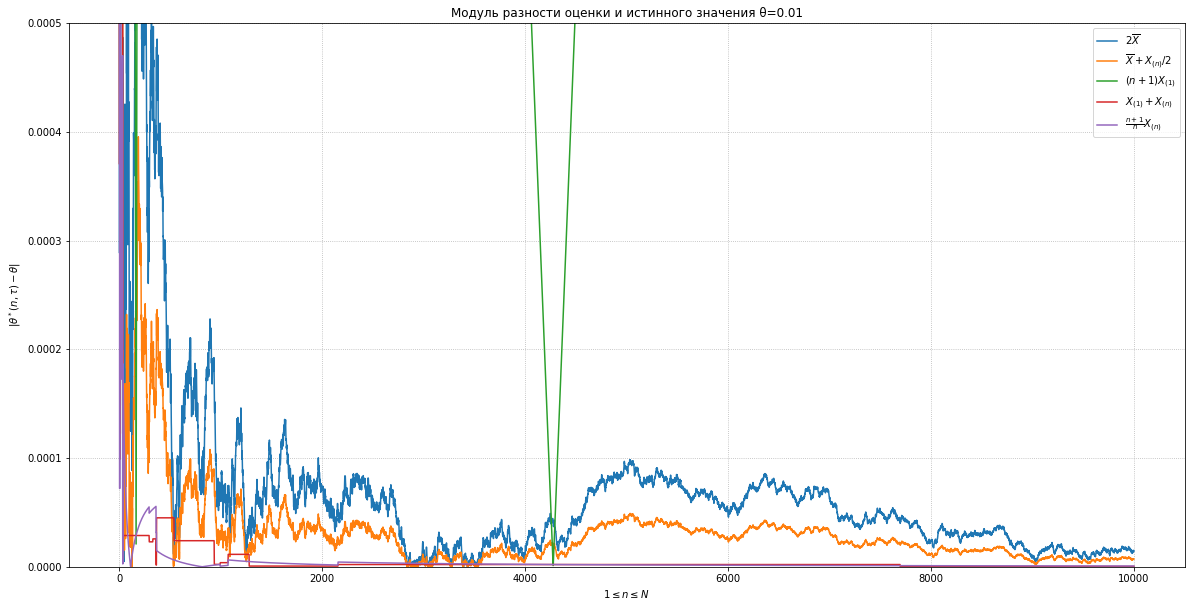

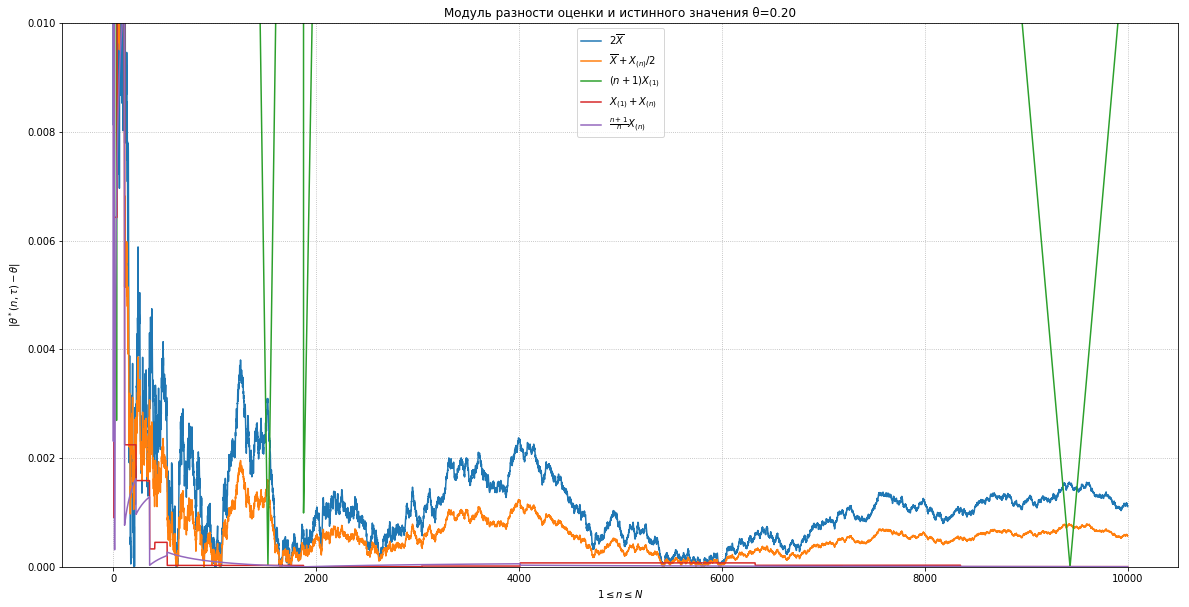

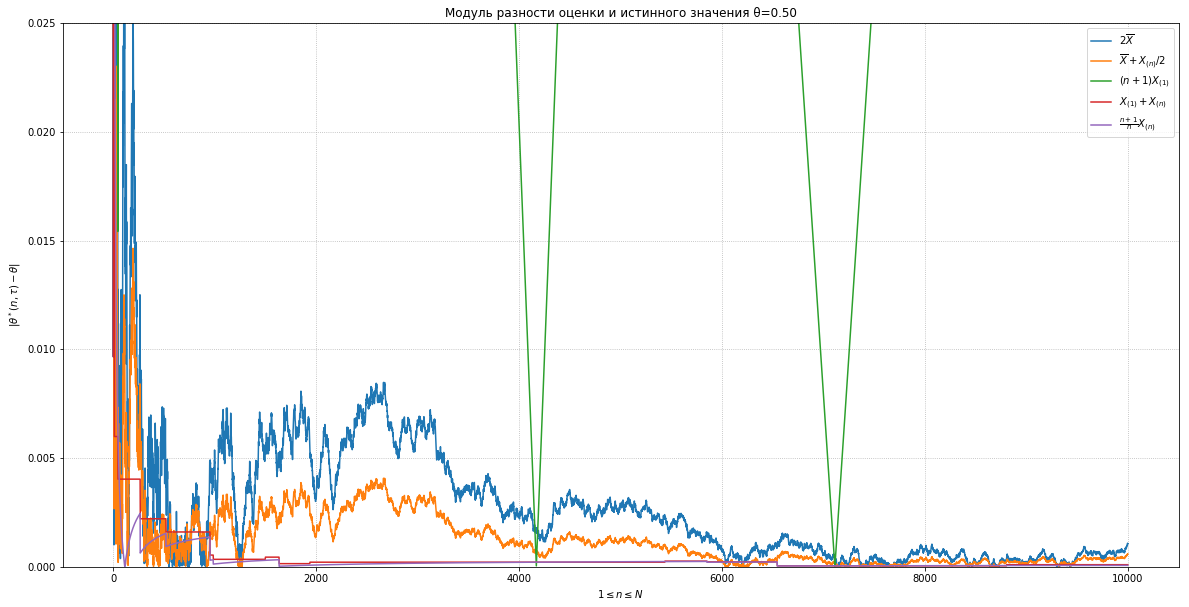

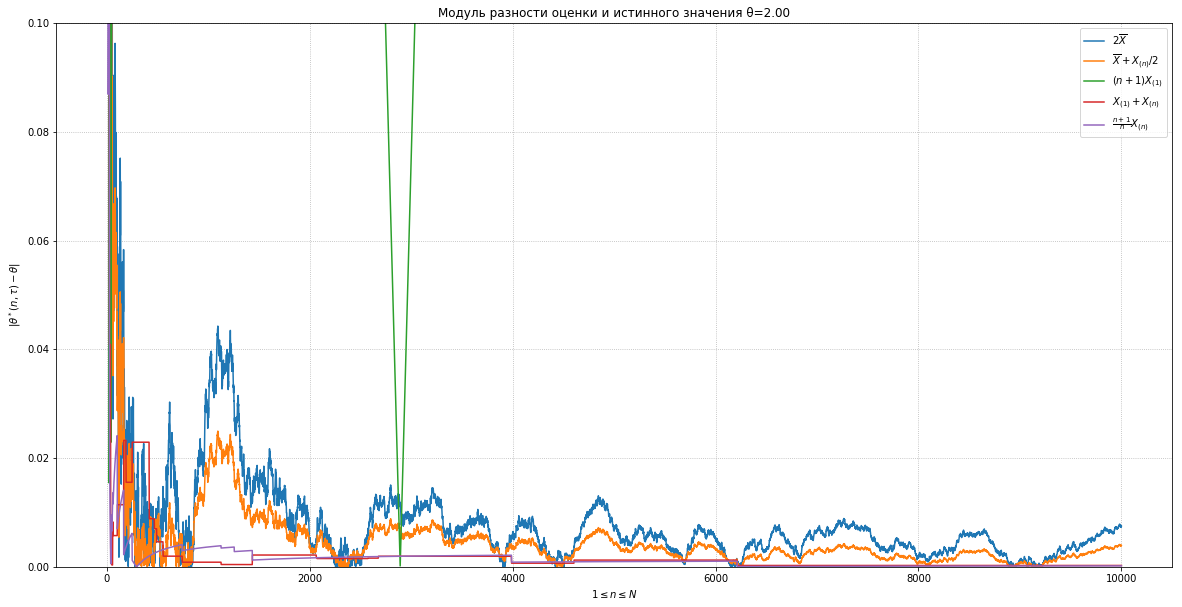

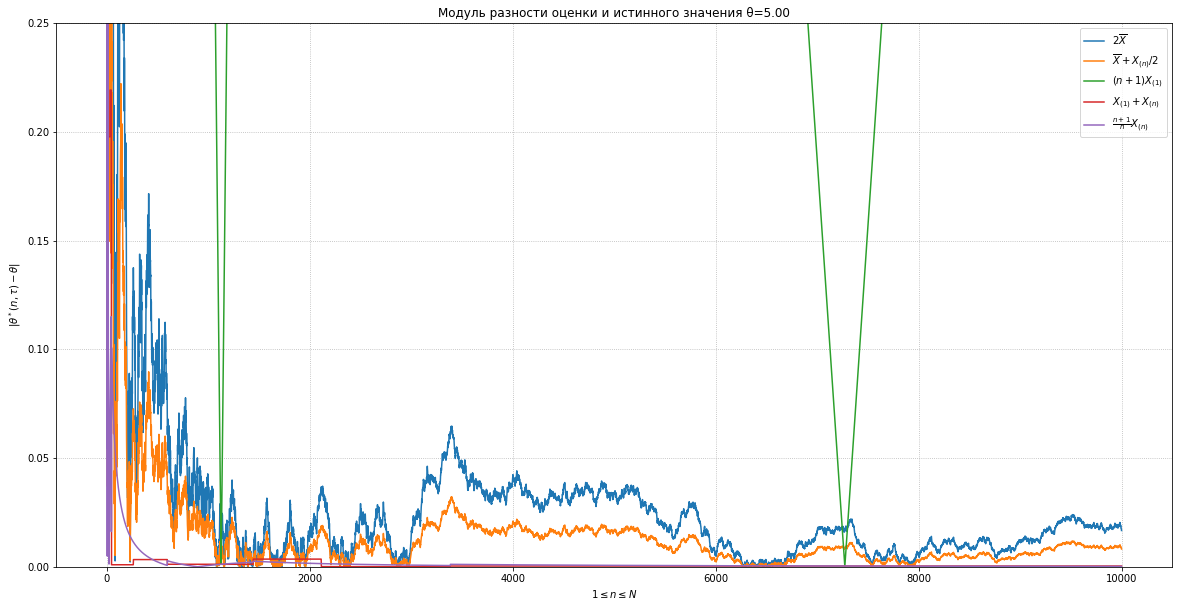

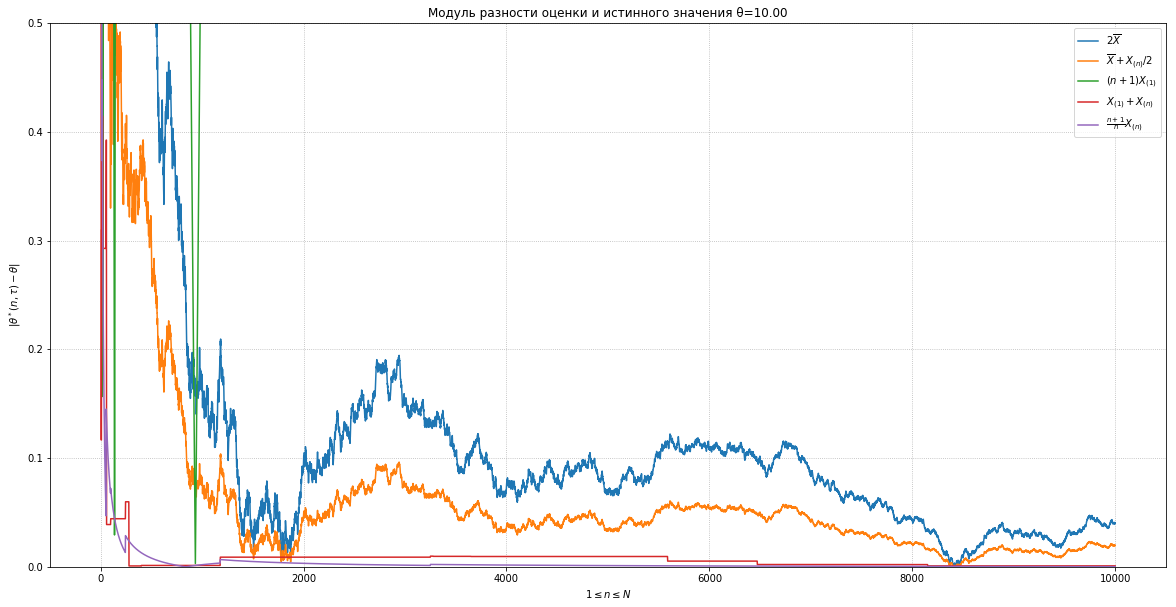

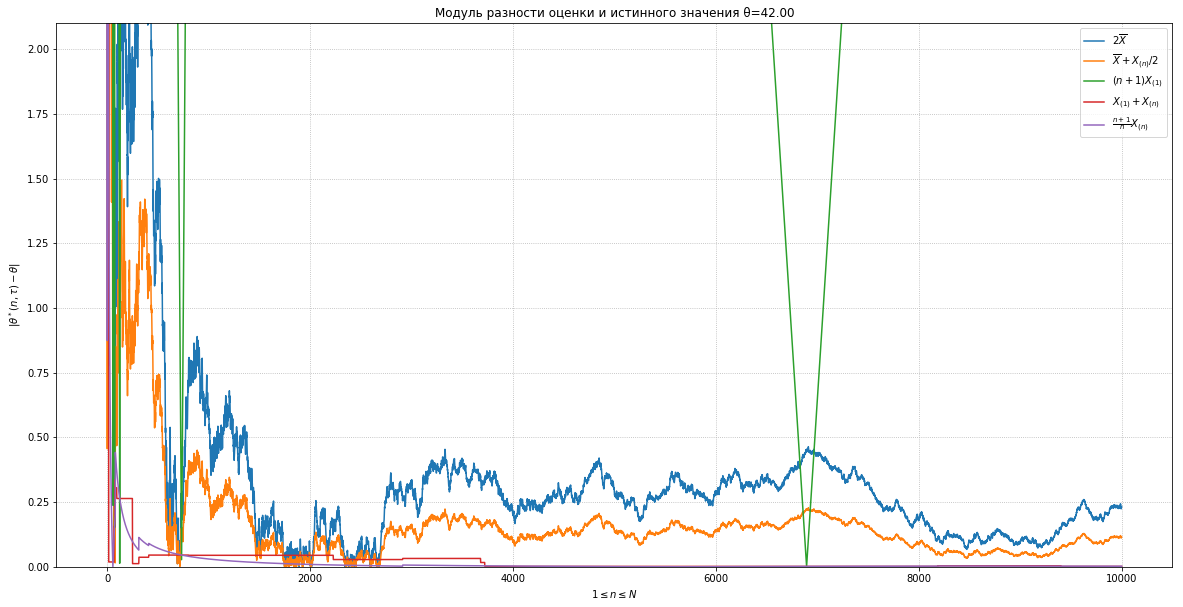

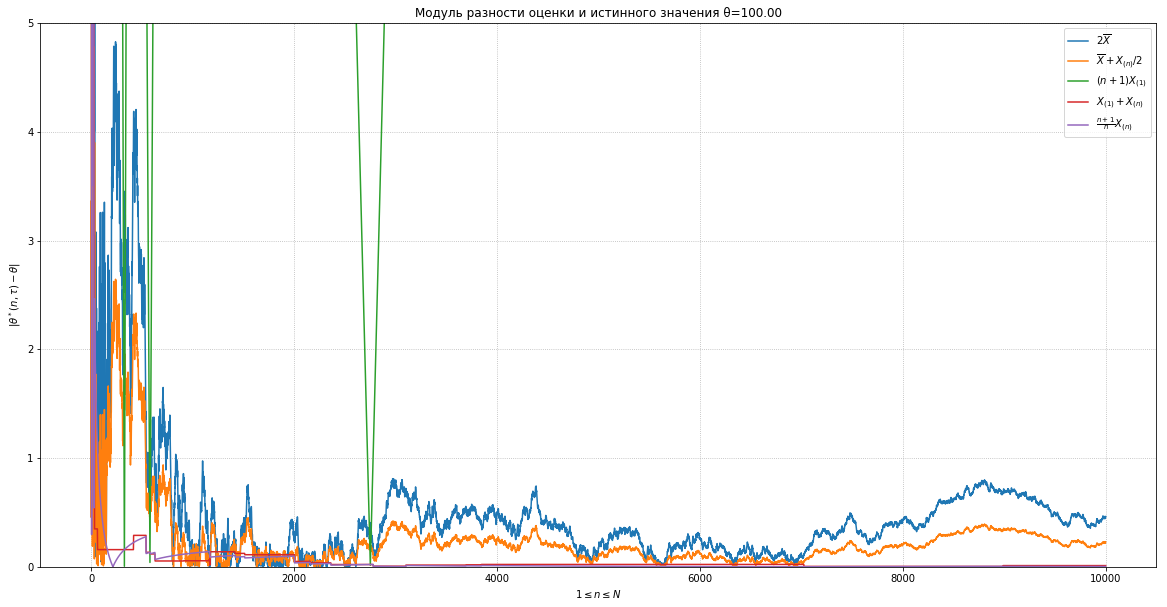

In [14]:
for theta in [0.01, 0.2, 0.5, 2, 5, 10, 42, 100]:
    investigate(theta)

# Вывод к первому заданию

В этом задании мы сравнили модуль разности оценок $2\overline{X},$ $\overline{X} + X_{(n)}/2,$ $(n + 1)X_{(1)},$
$X_{(1)} + X_{(n)},$ $\frac{n+1}{n}X_{(n)}$ с истинным значением параметра $\theta$ для $\theta \in \{0.01, 0.2, 0.5, 1, 2, 5, 10, 42, 100\}$ для всех $n \leq N$. На практике показали несостоятельность оценки $(n + 1)X_{(1)}$, также можно сделать вывод, что самоое лучшее поведение имеют оценки $X_{(1)} + X_{(n)}$ и $\frac{n+1}{n}X_{(n)}$.

# Второе задание

(К теоретической задаче 5) \\
Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального
распределения с параметром $\theta = 1$ для $N = 10^4.$ Для всех
$n\leq N$ посчитайте оценку $(k!/\overline{X^k})^{1/k}$ параметра
$\theta.$ Проведите исследование, аналогичное предыдущей задаче, и
выясните, при каком $k$ оценка ведет себя лучше (рассмотрите не
менее 10 различных значений $k$).

In [0]:
N, THETA = 10**4, 1

Сгенерируем выборку из экспоненциального
распределения с параметром $\theta = 1$:

In [0]:
observations = stats.expon.rvs(size=N, loc=0, scale=THETA)

Напишем функцию построения графиков для каждого $k:$

In [0]:
def investigate_kth_param(observations, k=1, param=THETA):
    param_estimation= np.fromiter(
      map(
        lambda n: (factorial(k) / np.mean(observations[:n+1]**k)) ** (1/k),
        np.arange(0, N, 1)),
      dtype=np.float64
    )
    abs_diff = np.abs(param_estimation - param)
    plt.figure(figsize=(20, 10))
    plt.ylim((0., .75))
    plt.title("Модуль разности оценки и истинного значения θ при k=%d" % k)
    plt.xlabel('$1\leq n \leq N$')
    plt.ylabel('$|θ^*(n, \\tau) - θ|$')
    plt.plot(np.linspace(0, N, N), abs_diff)
    plt.grid(ls=':')
    plt.show()

### Исследуем при каком k оценка ведет себя лучше

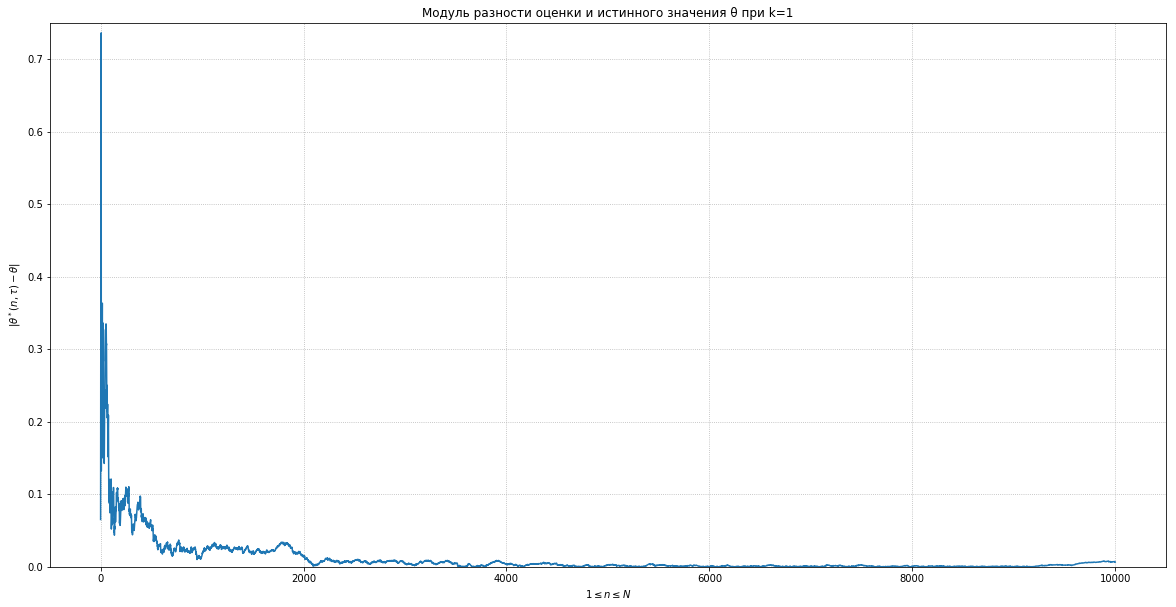

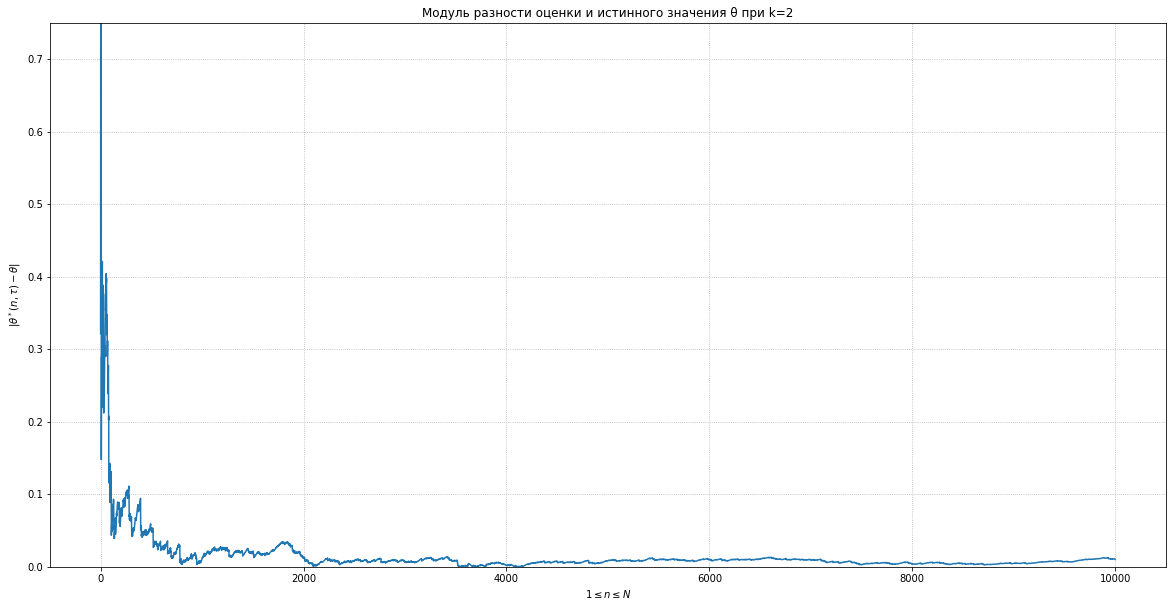

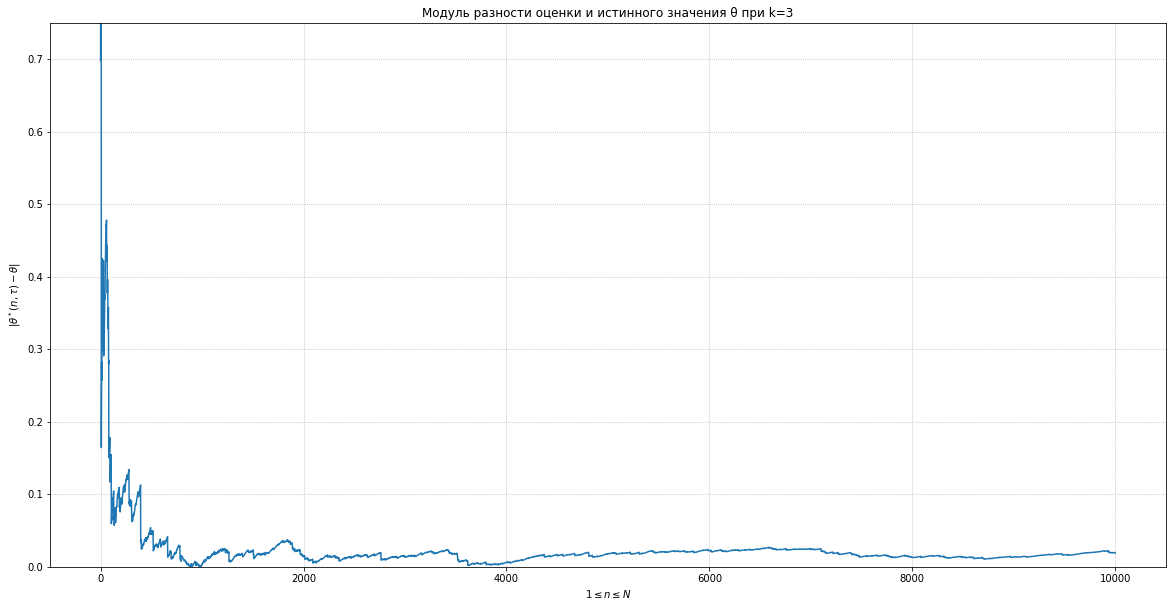

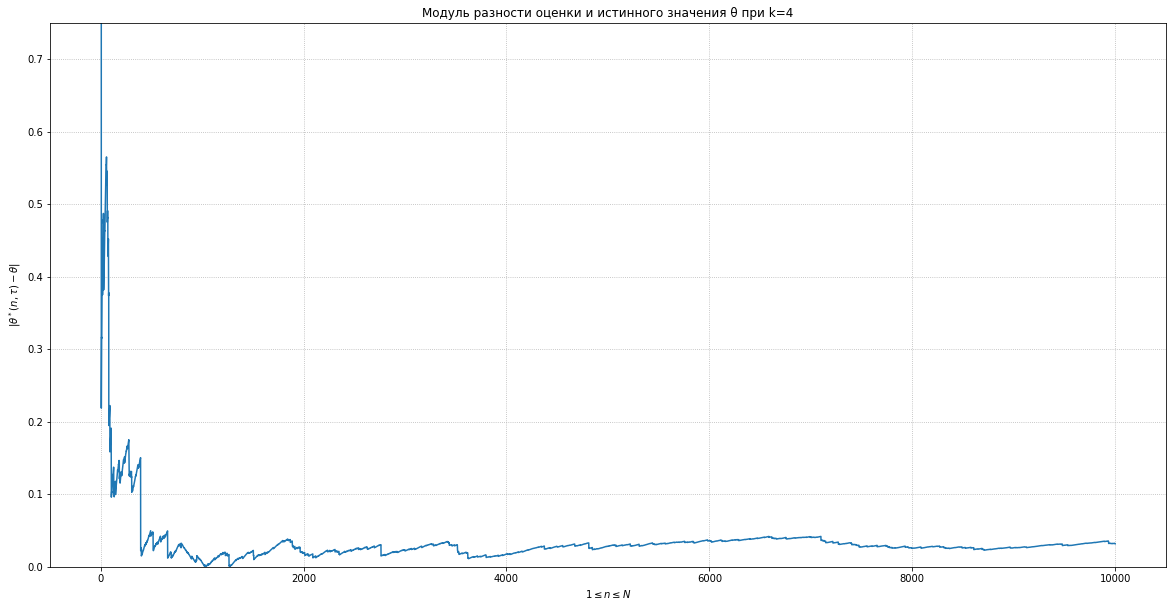

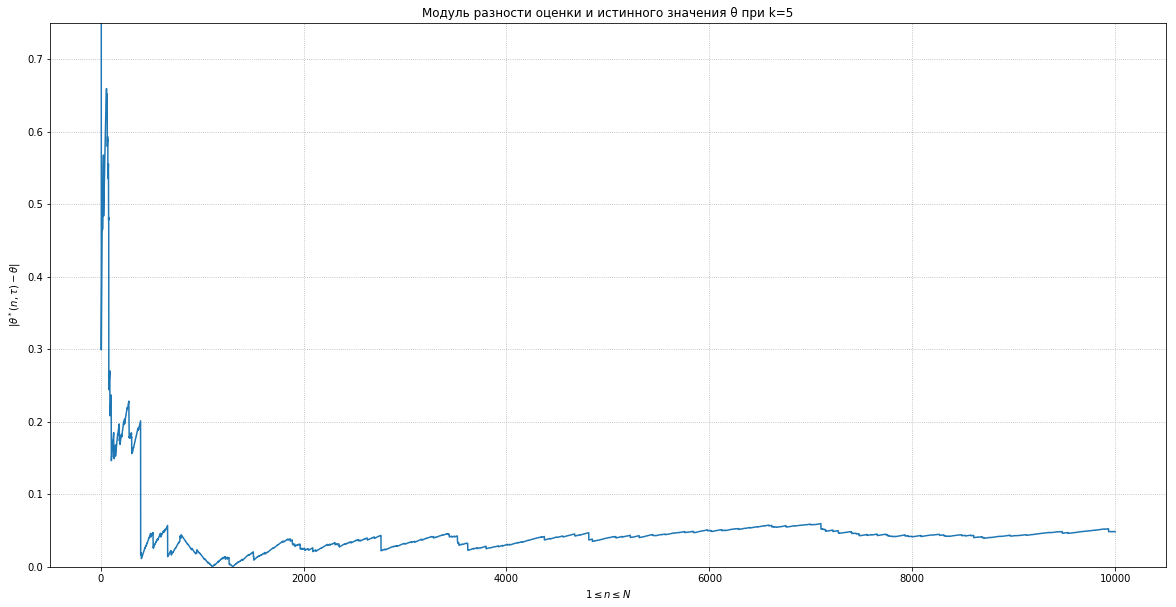

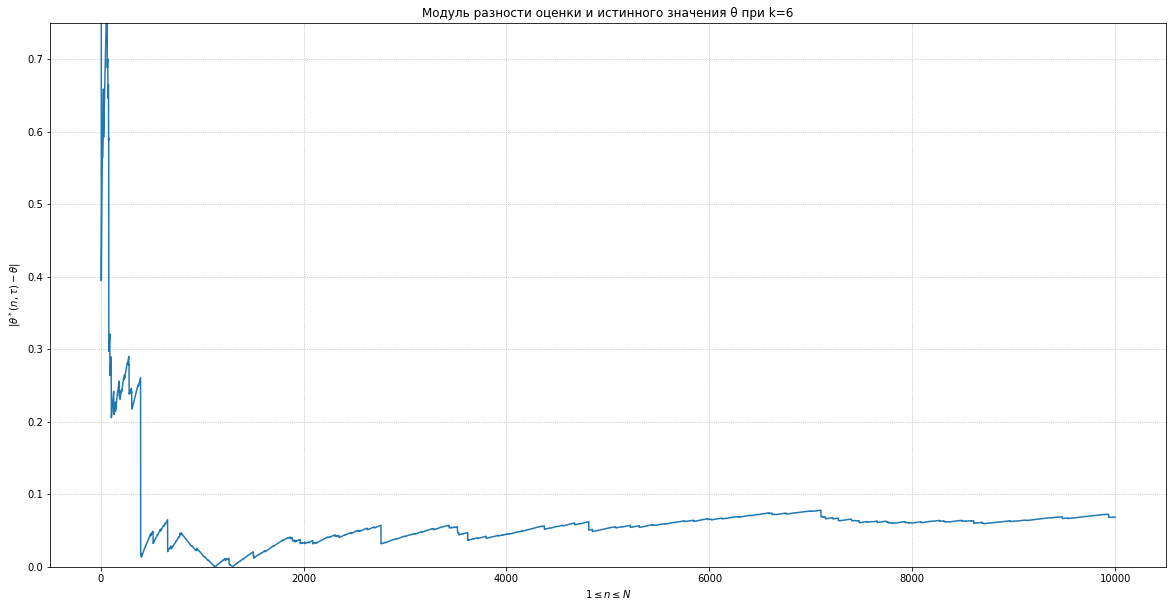

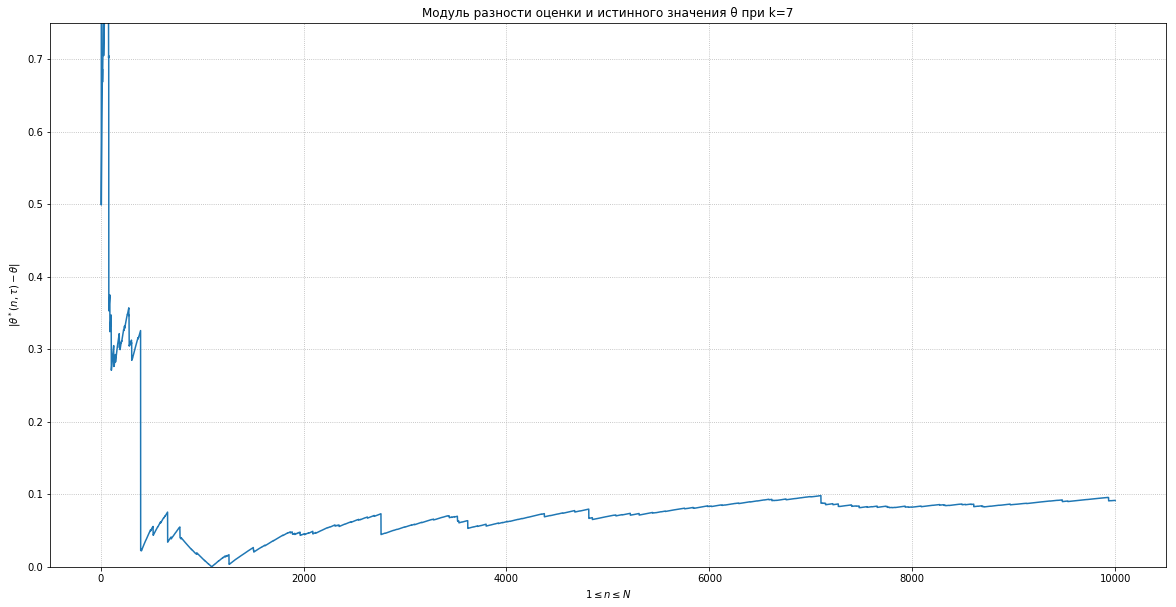

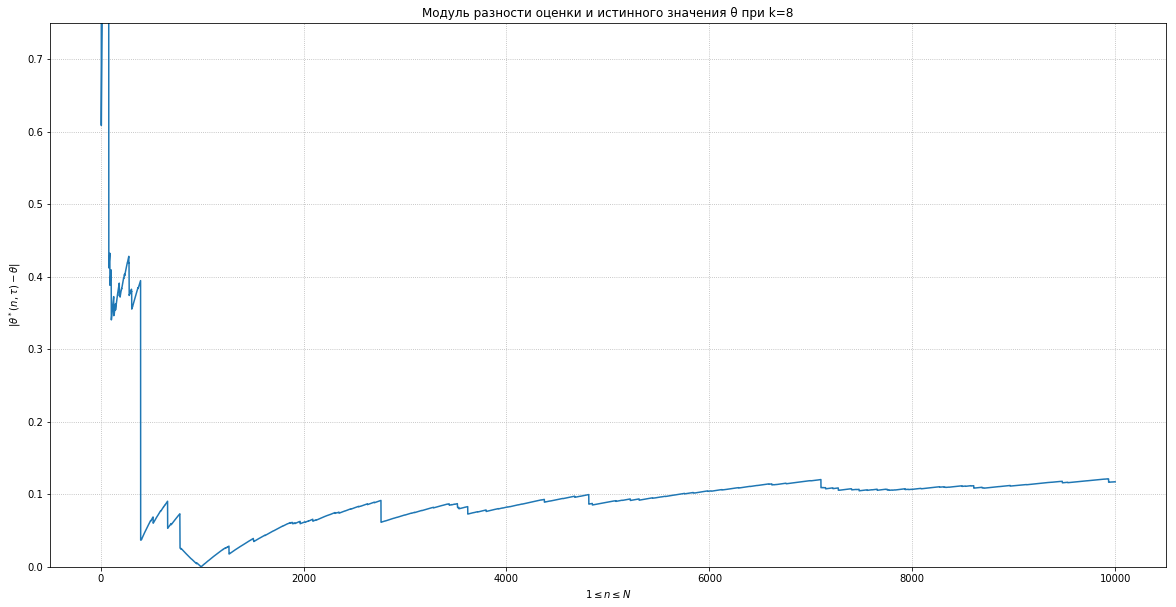

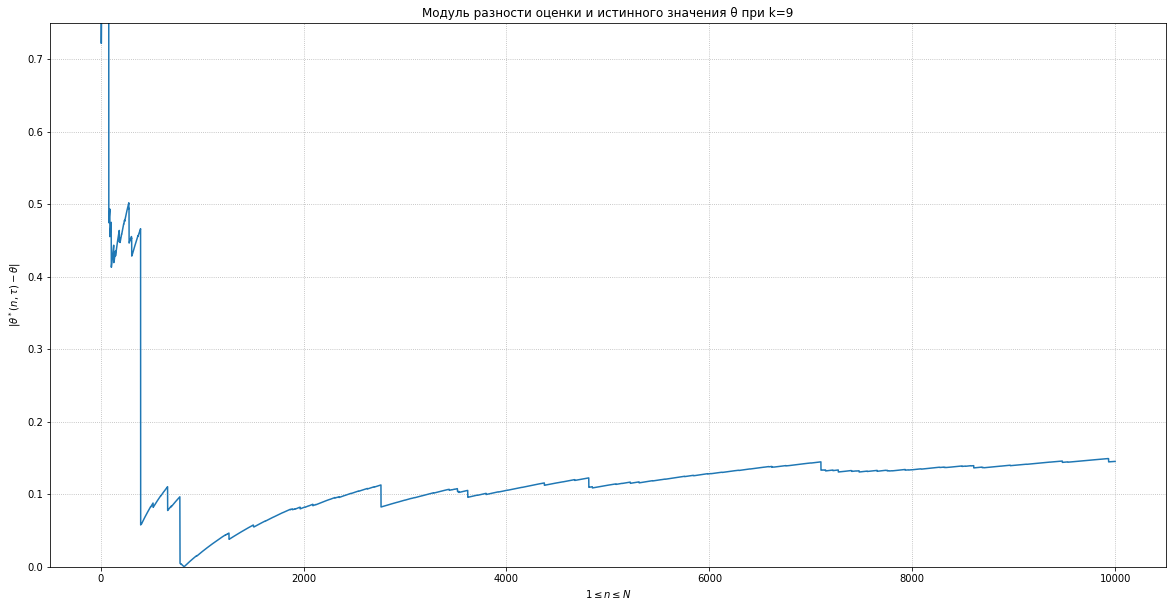

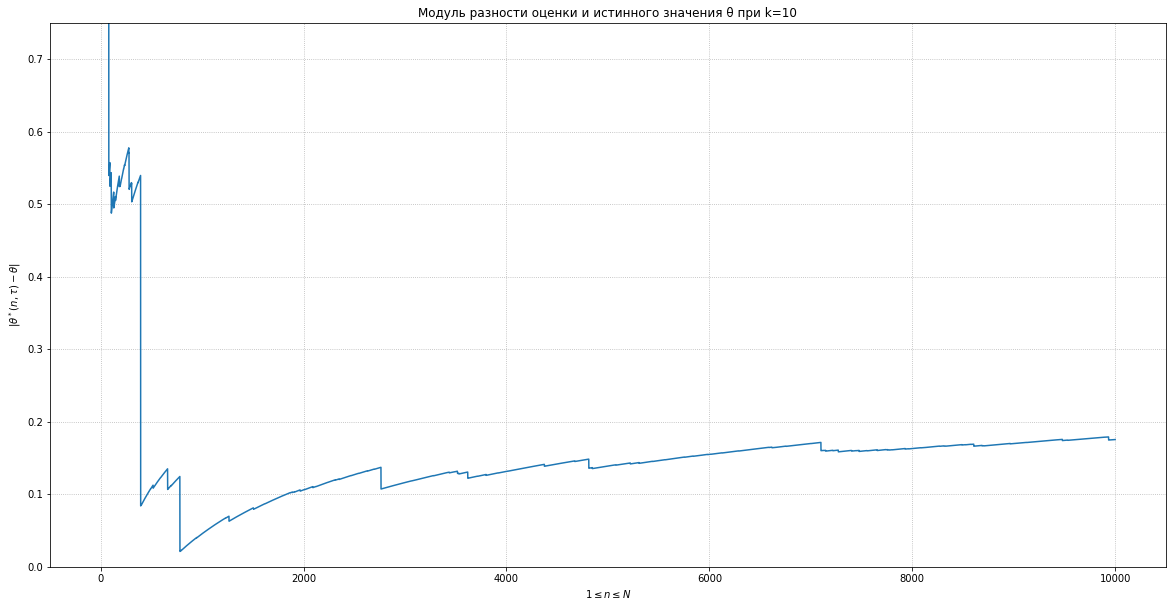

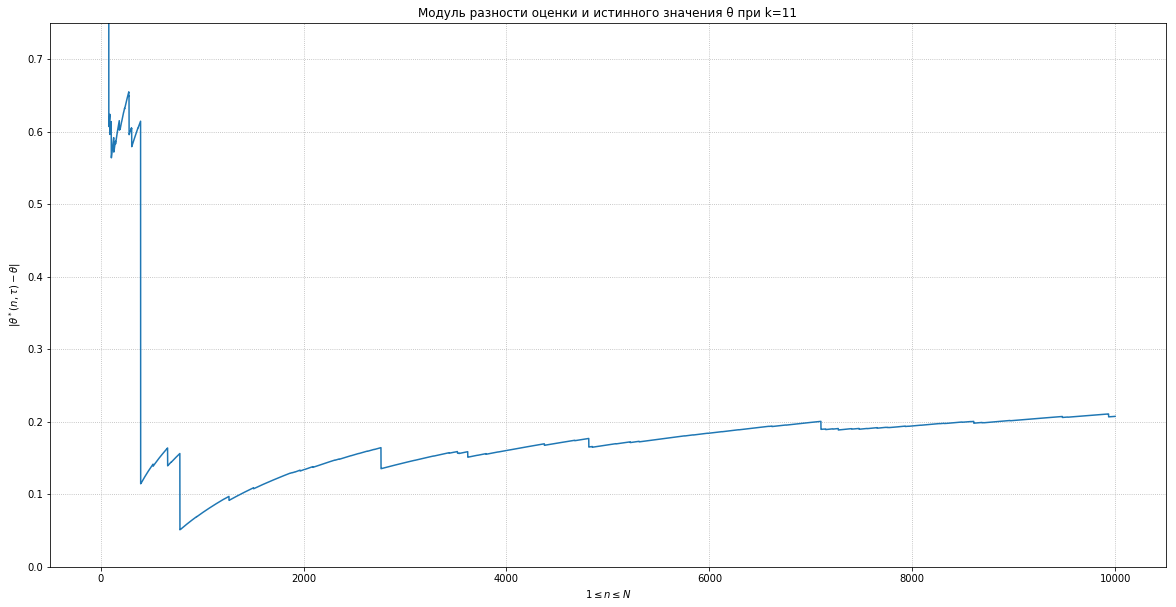

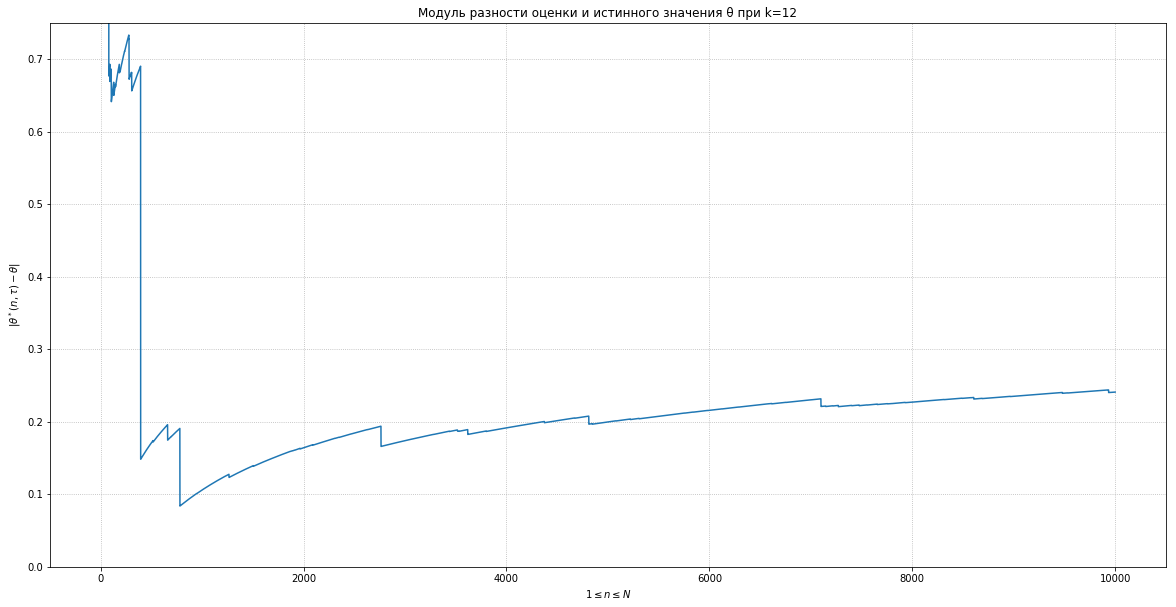

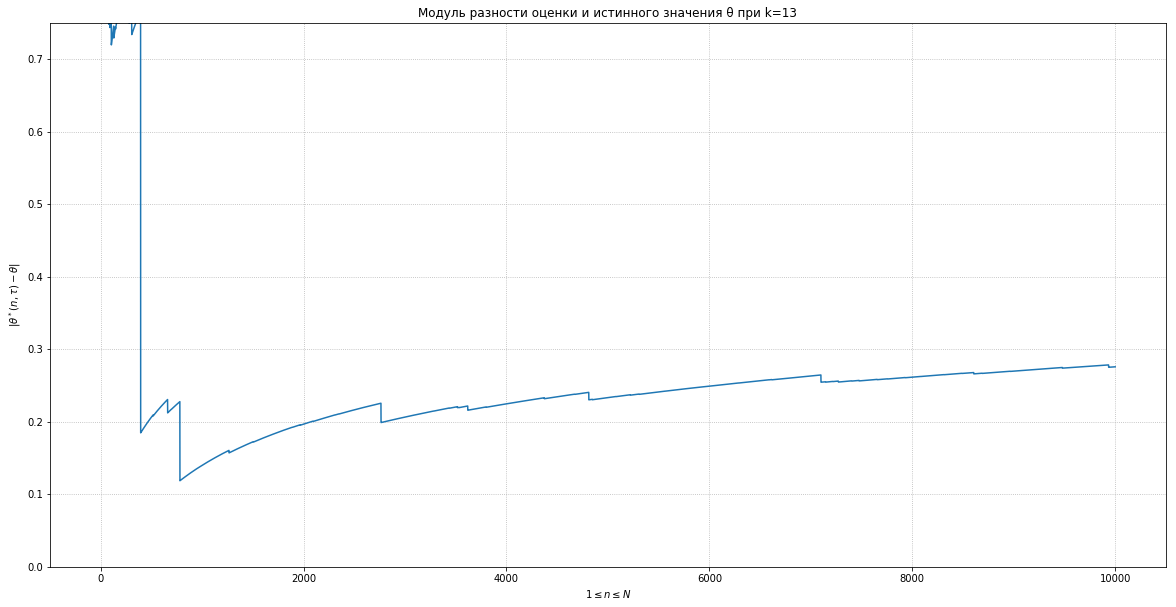

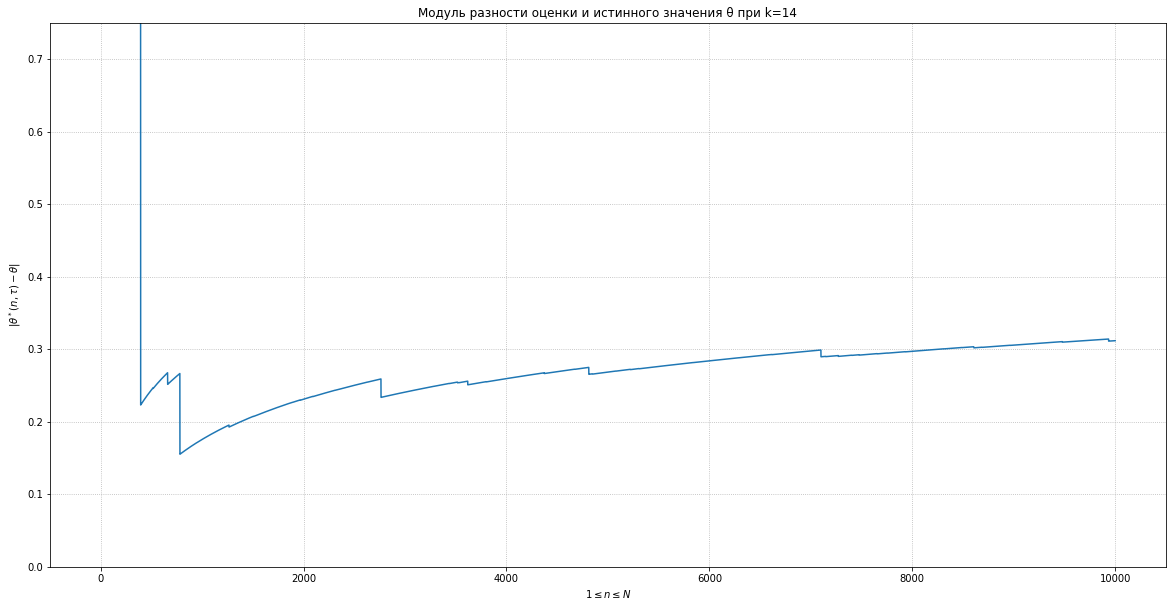

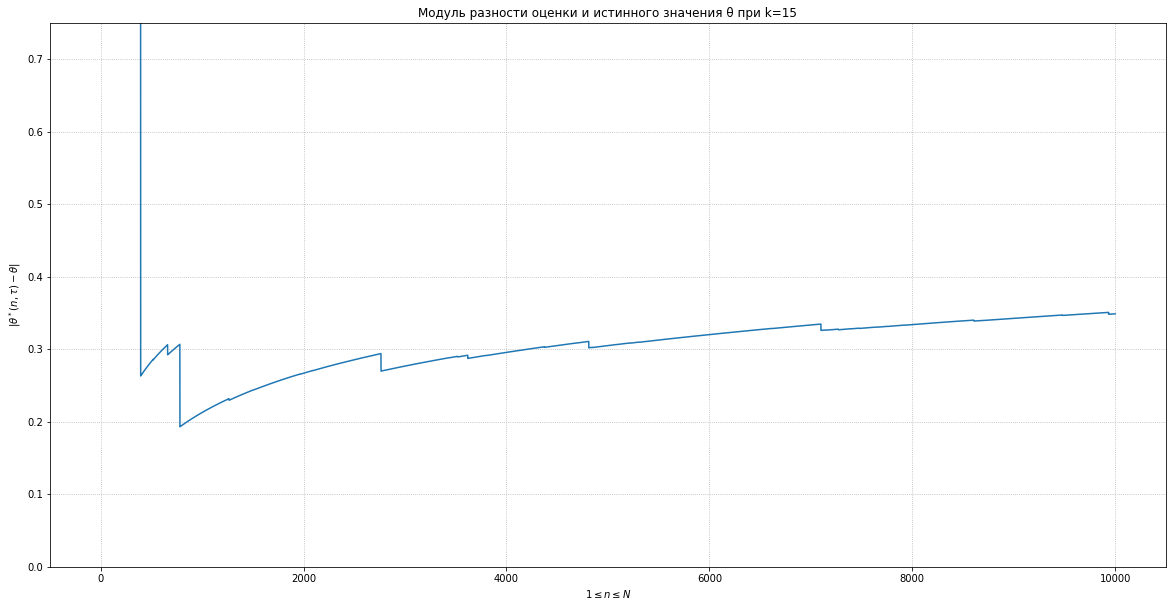

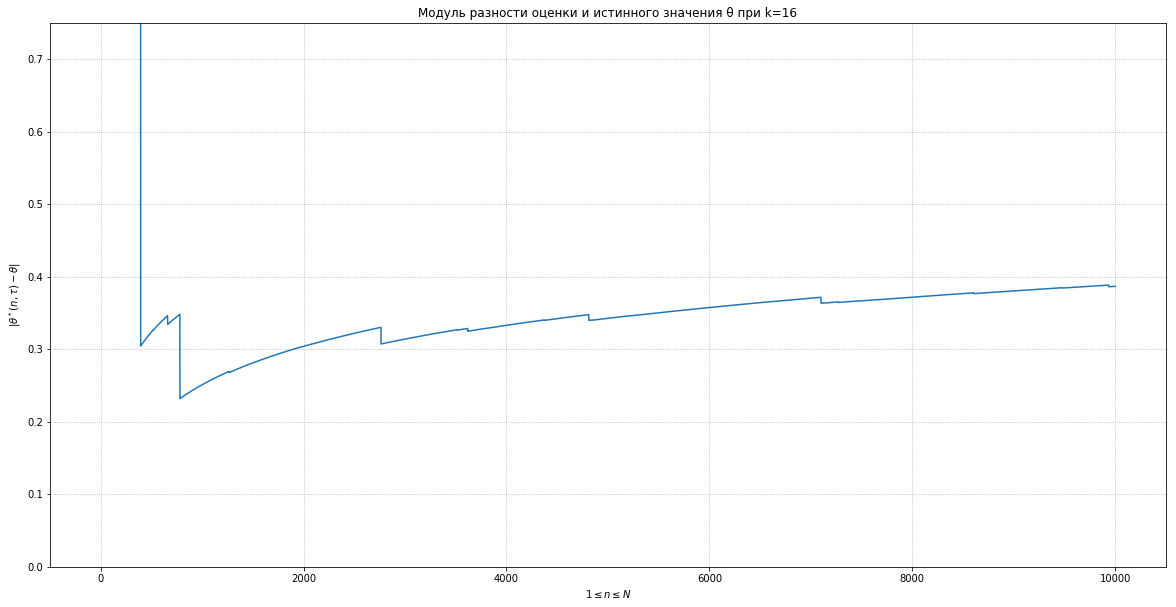

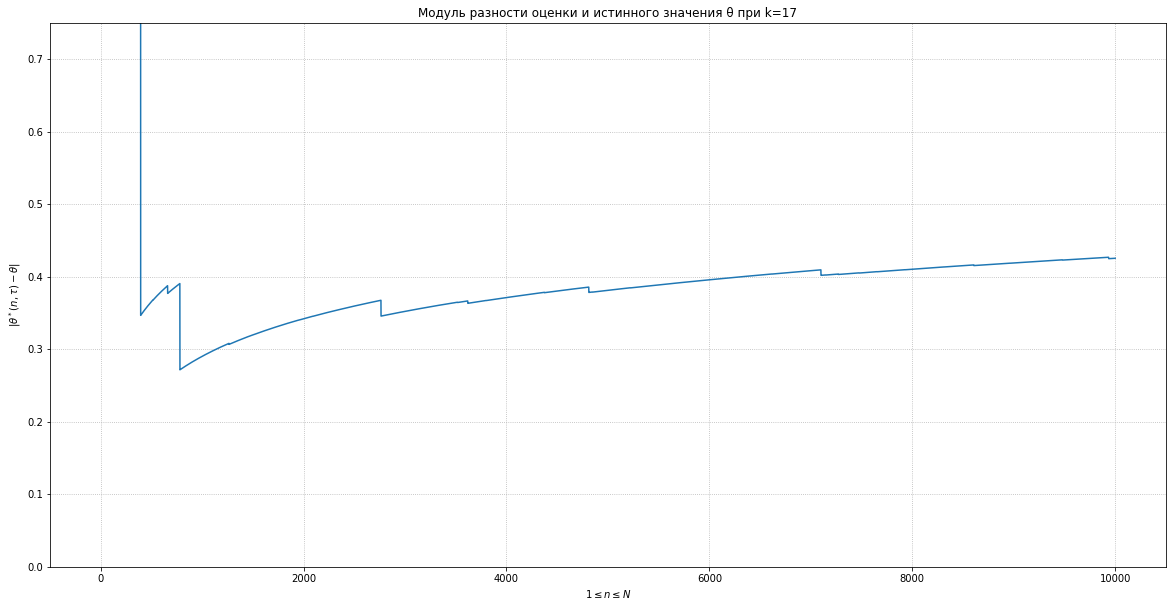

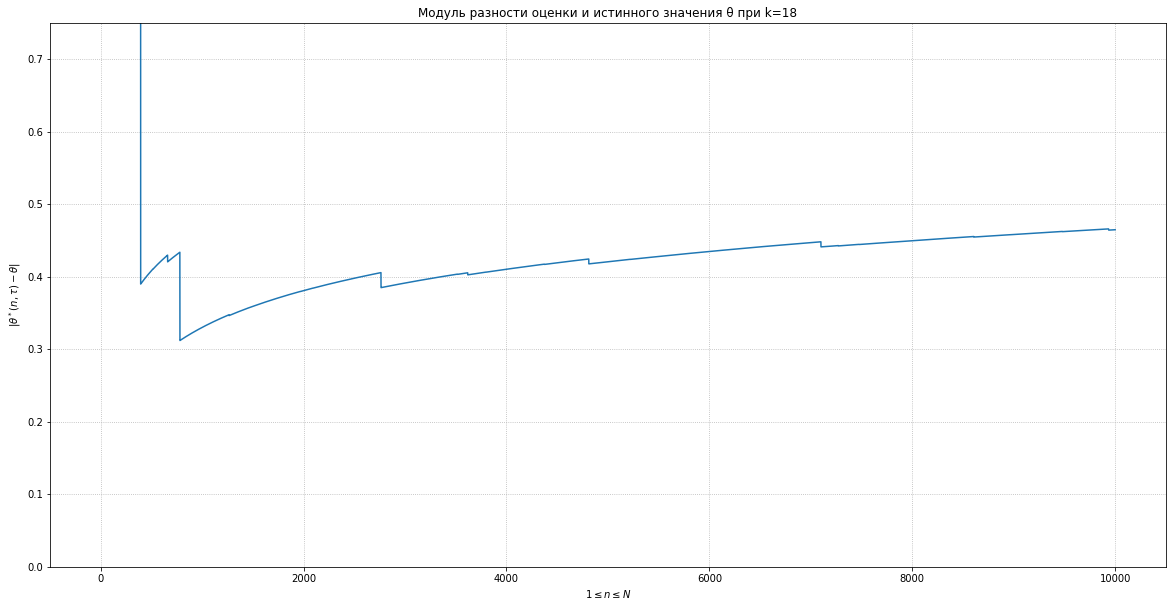

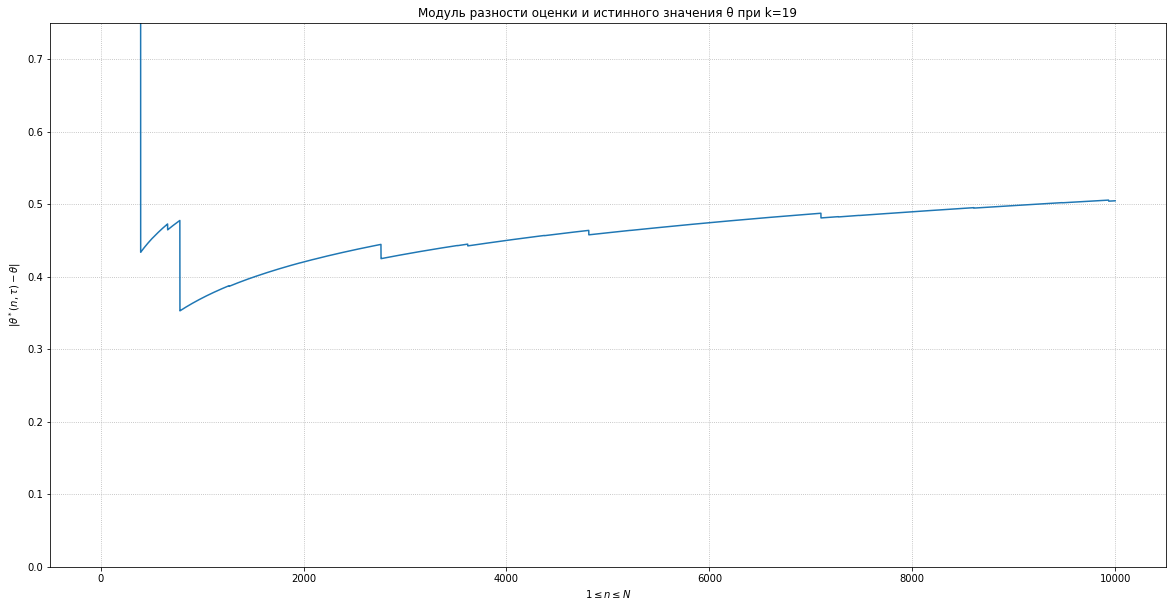

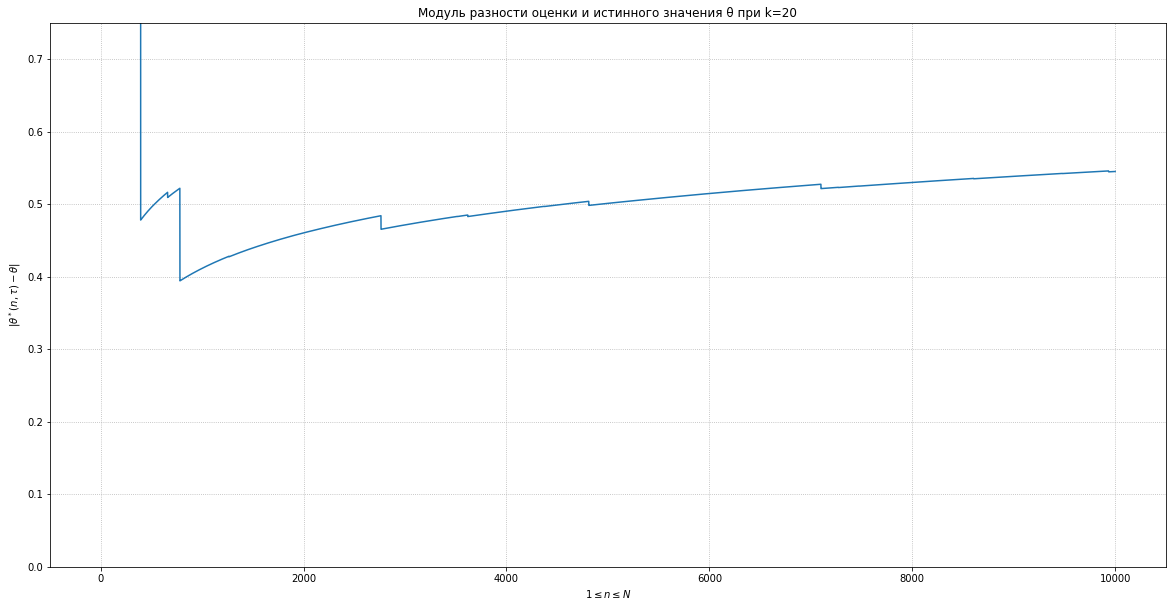

In [18]:
max_k = 20
for k in range(1, max_k+1):
    investigate_kth_param(observations, k)

Как видим, достаточно рассмотреть только при $ k \leq 5 $

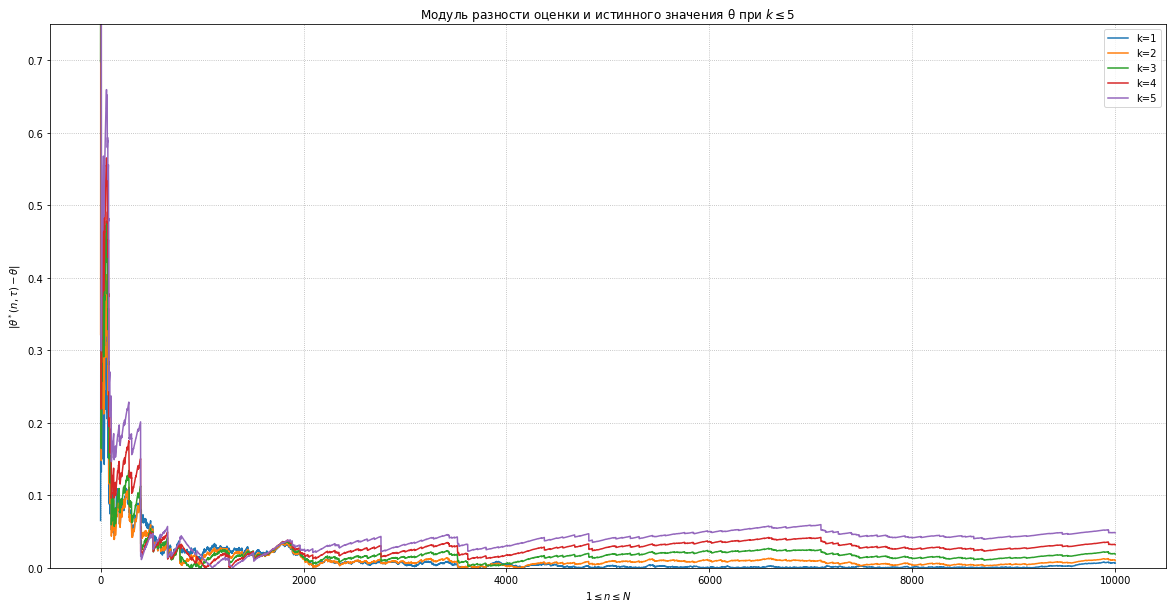

In [19]:
max_k = 5
param_estimation = {
  k: np.fromiter(map(
      lambda n: (factorial(k) / np.mean(observations[:n+1]**k)) ** (1/k),
      np.arange(0, N, 1)), dtype=np.float64) 
    for k in range(1, max_k+1)
}
plt.figure(figsize=(20, 10))
plt.ylim((0., .75))
plt.title("Модуль разности оценки и истинного значения θ при $k \leq 5$")
plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$|θ^*(n, \\tau) - θ|$')
for k in range(1, max_k+1):
    plt.plot(
      np.linspace(0, N, N),
      np.abs(param_estimation[k] - THETA),
      label=("k=%d" % k)
    )
plt.grid(ls=':')
plt.legend()
plt.show()

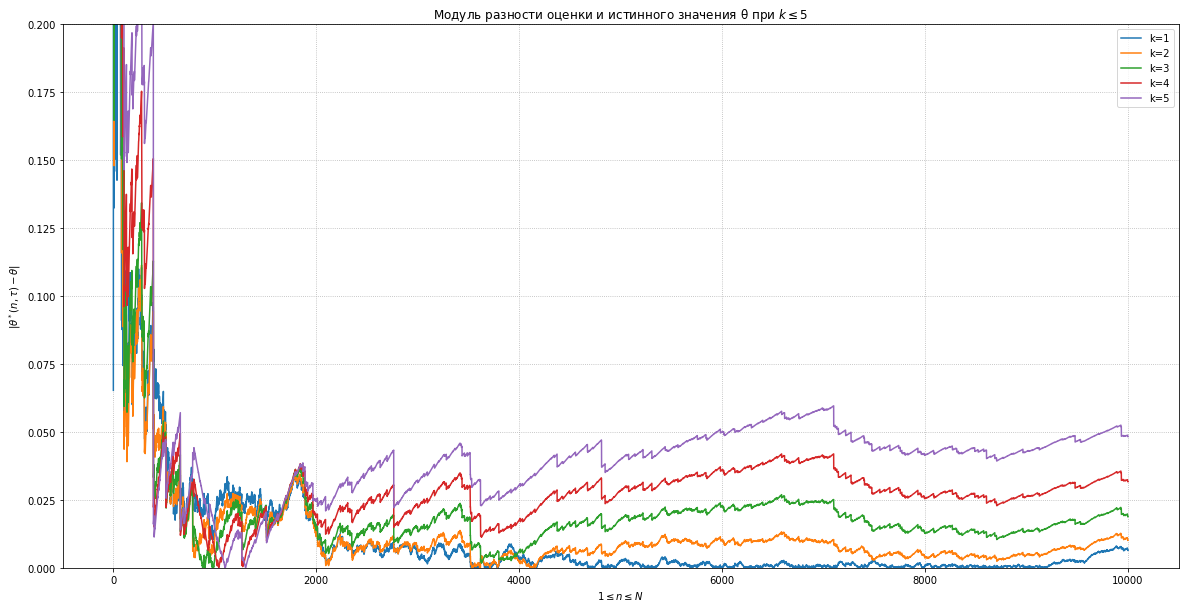

In [20]:
plt.figure(figsize=(20, 10))
plt.ylim((0., .2))
plt.title("Модуль разности оценки и истинного значения θ при $k \leq 5$")
plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$|θ^*(n, \\tau) - θ|$')
for k in range(1, max_k+1):
    plt.plot(
      np.linspace(0, N, N),
      np.abs(param_estimation[k] - THETA),
      label=("k=%d" % k)
    )
plt.grid(ls=':')
plt.legend()
plt.show()

Рассмотрим отдельно поведение при $n \leq 2000$

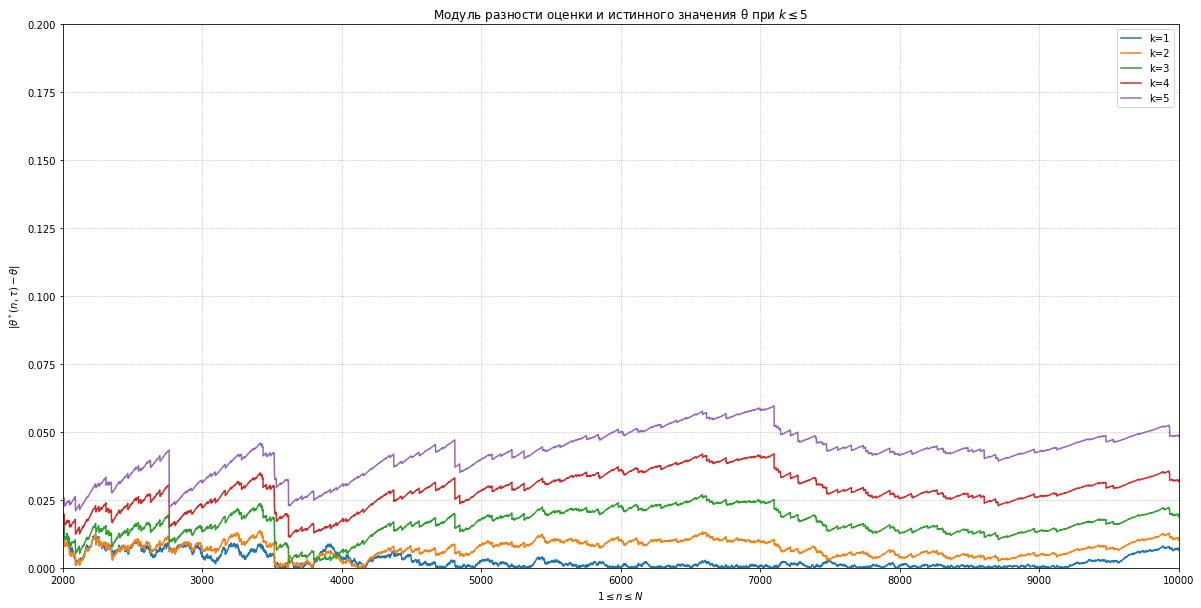

In [21]:
plt.figure(figsize=(20, 10))
plt.ylim((0., .2))
plt.title("Модуль разности оценки и истинного значения θ при $k \leq 5$")
plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$|θ^*(n, \\tau) - θ|$')
plt.xlim((2000, N))
for k in range(1, max_k+1):
    plt.plot(
      np.linspace(0, N, N),
      np.abs(param_estimation[k] - THETA),
      label=("k=%d" % k)
    )
plt.grid(ls=':')
plt.legend()
plt.show()

И при $n \geq 2000$

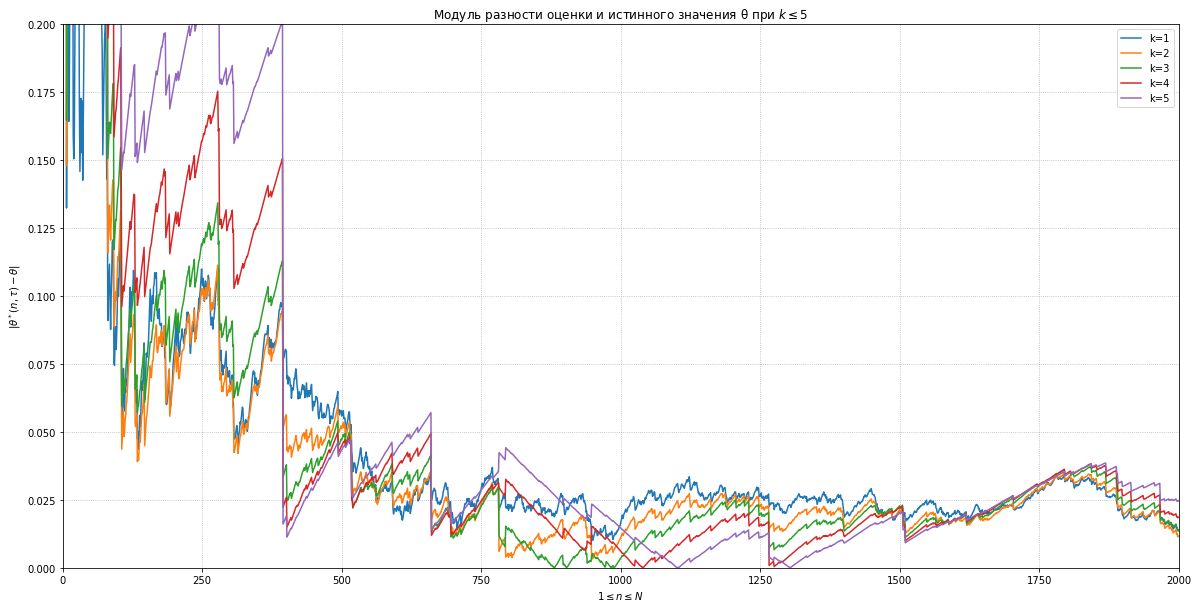

In [22]:
plt.figure(figsize=(20, 10))
plt.ylim((0., .2))
plt.title("Модуль разности оценки и истинного значения θ при $k \leq 5$")
plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$|θ^*(n, \\tau) - θ|$')
plt.xlim((0, 2000))
for k in range(1, max_k+1):
    plt.plot(
      np.linspace(0, N, N),
      np.abs(param_estimation[k] - THETA),
      label=("k=%d" % k)
    )
plt.grid(ls=':')
plt.legend()
plt.show()

# Вывод ко второму заданию

На практике было эмпирически проверено, что оценка $(k!/\overline{X^k})^{1/k}$ с параметром $\theta = 1$ в экспоненциальном распределении при росте $k \leq 5$ сперва улучшается, а потом ухудшается.


# Третье задание

Придумайте распределение, у которого конечны первые
четыре момента, а пятый -- нет. Сгенерируйте выборку $X_1, ..., X_N$
из этого распределения для $N = 10^4.$ Постройте график плотности,
а также нанесите точки выборки на график (с нулевой
$y$-координатой). Для всех $n\leq N$ посчитайте оценку $s^2 =
s^2(X_1, ..., X_N)$ для дисперсии. Постройте график зависимости
модуля разности оценки дисперсии и ее истинного значения от $n.$
Проведите аналогичное исследование для выборки из распределения
Коши, где вместо графика модуля разности оценки дисперсии и ее
истинного значения (которого не существует) постройте график оценки
дисперсии.

 ### Искомым распределением может быть
Введем распределение с плотностью: $\;p(x)=\frac{5}{x^6}\cdot I(x\geq 1)$. \\
Проверим, что $p$ корректно задано:
 

*   очевидно, что $p: \mathbb{R} \rightarrow \mathbb{R}_{+}$
*   $\underset{\mathbb{R}}{\int} p(x) dx = 1$, т.к.:

$$\underset{\mathbb{R}}{\int} p(x) dx = \underset{\mathbb{[1;+\infty)}}{\int} \frac{5}{x^6} dx = -\frac{5}{5} \cdot \underset{\mathbb{[1;+\infty)}}{\int} d(x^{-5}) = -x^{-5}|_{1}^{+\infty} = 1.$$

Т.е., мы задали распределение: $$ F(x) = \underset{\mathbb{(-\infty;x]}}{\int} p(t) dt = \underset{\mathbb{[1;x]}}{\int} \frac{5}{t^6} dt = 1-\frac{1}{x^5}$$

У заданного распределения конечны первые четыре момента, а пятый -- нет, что явно следует из сходимости интеграла $ \underset{\mathbb{[1;+\infty)}}{\int} \frac{1}{x^{\alpha}} dx $ от параметра $\alpha$.

In [0]:
N = 10**4

### Построим распределение

In [0]:
class custom_gen(stats.rv_continuous):
    def _pdf(self, x):
        return np.where(x < 1, 0., 5./x**6)
    def _cdf(self, x):
        return np.where(x < 1, 0., 1. - 1./x**5)

      
custom = custom_gen(name="custom")

### Сгенерируем выборку и выборочную дисперсию, построим график плотности

In [0]:
observations = custom.rvs(size=N)

Построим график плотности с точками выборки на графике

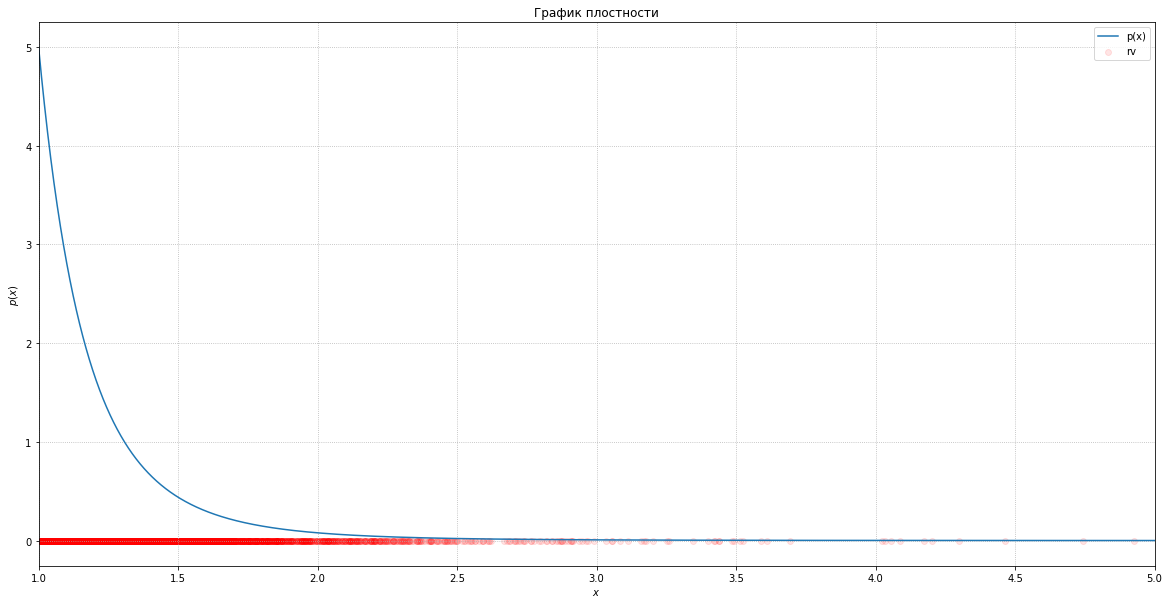

In [26]:
plt.figure(figsize=(20, 10))
plt.title("График плостности")
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.xlim((1, 5))
plt.scatter(observations[:N], np.zeros(N), alpha=0.1, color = 'r', 
            linewidths=1, label="rv")
x = np.linspace(observations[:N+1].min(), observations[:N+1].max(), N)
y = custom.pdf(x)
plt.plot(x, y, label="p(x)")
plt.legend()
plt.grid(ls=':')
plt.show()

Найдем выборочную дисперсию для всех $n\leq N$



In [0]:
calc_varience = lambda arr: (arr**2).mean() - arr.mean()**2

sample_variance = gen_evaluation_by_n(
    N, observations, lambda n: calc_varience(observations[:n+1]))

In [28]:
sample_variance

array([0.        , 0.00492173, 0.03786848, ..., 0.10957848, 0.10956757,
       0.10955904])

### Найдем дисперсию нашего распределения

Второй момент будет иметь равен:
$$ \xi\;\mathtt{\sim}\;p(x)=\frac{5}{x^6}\cdot I(x\geq 1) $$

$$ \text{Var}[\xi] = \text{E}[\xi^2] - (\text{E}[\xi])^2 $$

$$ \text{E}[\xi] = \underset{\mathbb{R}}{\int} x \cdot p(x)dx = \underset{\mathbb{[1;+\infty)}}{\int} x \cdot \frac{5}{x^6} dx = \underset{\mathbb{[1;+\infty)}}{\int} \frac{5}{x^5} dx = - \frac{5}{4 \cdot x^4}|_{1}^{\infty} = \frac{5}{4} $$

$$ \text{E}[\xi^2] = \underset{\mathbb{R}}{\int} x^2 \cdot p(x)dx = \underset{\mathbb{[1;+\infty)}}{\int} x^2 \cdot \frac{5}{x^6} dx = \underset{\mathbb{[1;+\infty)}}{\int} \frac{5}{x^4} dx = - \frac{5}{3 \cdot x^3}|_{1}^{\infty} = \frac{5}{3} $$

$$ \text{Var}[\xi] = \frac{5}{3} - (\frac{5}{4})^2 = \frac{5}{48} $$

In [29]:
var = 5. / 48.
print(f"var = {var}")

var = 0.10416666666666667


### Построим график

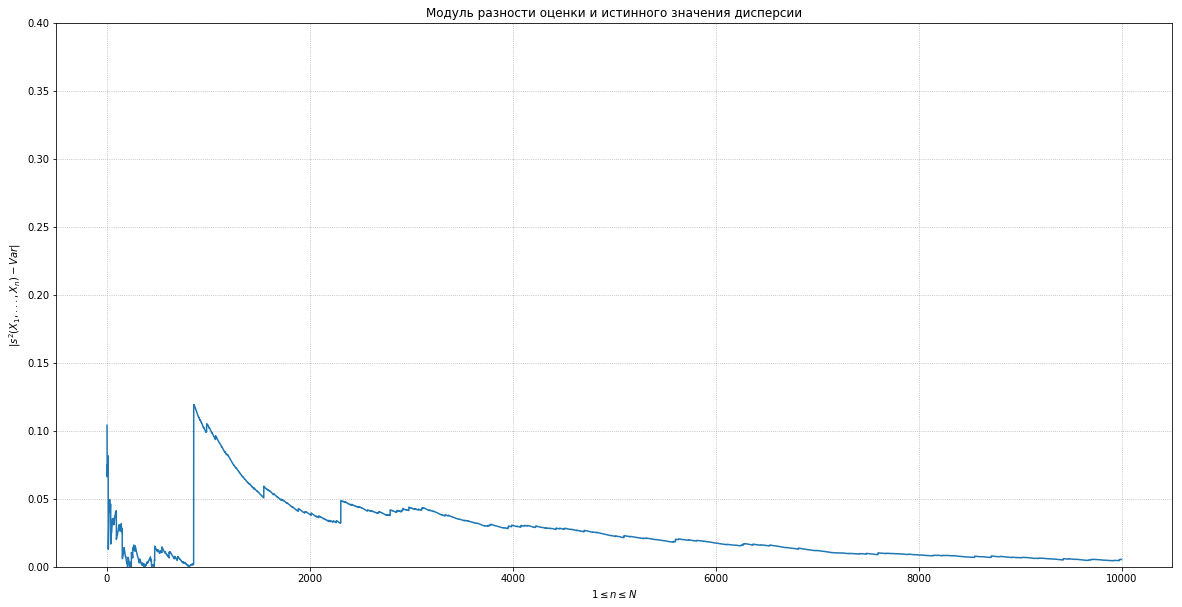

In [30]:
abs_diff = np.abs(sample_variance - var)

plt.figure(figsize=(20, 10))
plt.title("Модуль разности оценки и истинного значения дисперсии")
plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$|s^2(X_1, ..., X_n) - Var|$')
plt.ylim((0, .4))
plt.plot(np.linspace(0, N, N), abs_diff)
plt.grid(ls=':')
plt.show()

### Сгенерируем выборку Коши и построим график

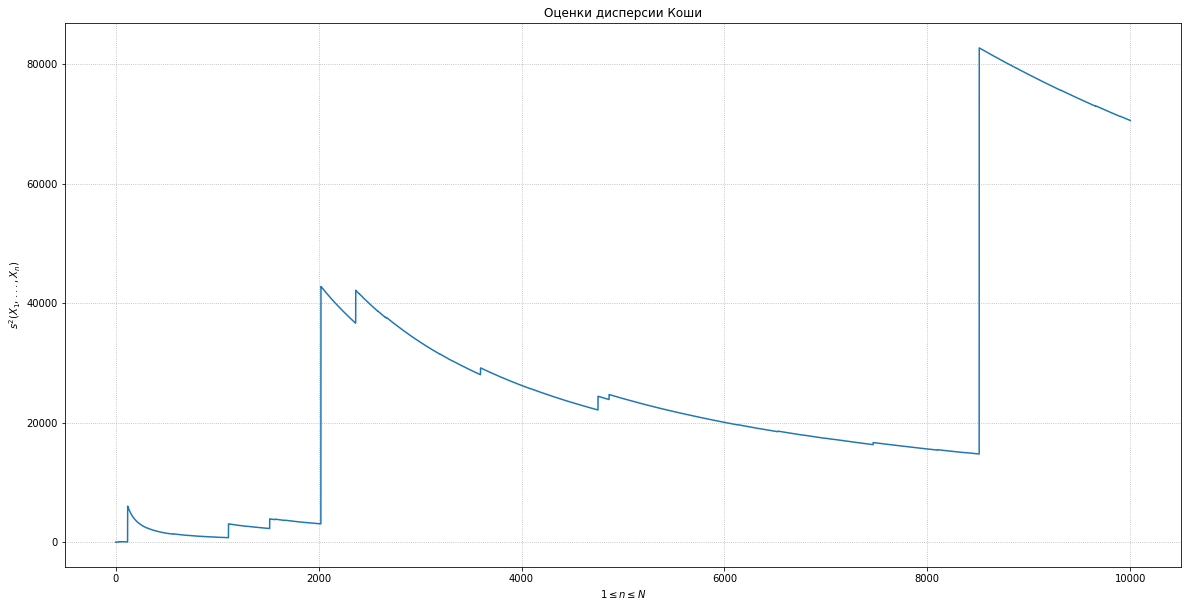

In [31]:
cauchy_observations = stats.cauchy.rvs(size=N)
sample_variance = gen_evaluation_by_n(
    N, cauchy_observations, lambda n: calc_varience(cauchy_observations[:n+1]))
plt.figure(figsize=(20, 10))
plt.title("Оценки дисперсии Коши")
plt.xlabel('$1\leq n \leq N$')
plt.ylabel('$s^2(X_1, ..., X_n)$')
plt.plot(
  np.linspace(0, N, N),
  sample_variance
)
plt.grid(ls=':')
plt.show()

# Вывод к третьему заданию

Было придумано распределение, у которого конечны первые
четыре момента, а пятый -- нет. Сгенерировано выборку $X_1, ..., X_N$
из этого распределения для $N = 10^4.$ Построен график плотности. На практике (на графике оценки дисперсии) ведет себя "плохо" в том смысле, что график почти всюду убывает, но происходят очень резкие скочки в отдельных точках.

# Четвертое задание

Сгенерируйте выборку $X_1, ..., X_N$ из стандартного нормального распределения для
$N = 10^4.$ Для всех $n\leq N$ посчитайте по ней эмпирическую
функцию распределения. Для некоторых $n$ (например, $n \in \{10, 25,
50, 100, 1000, N\}$) постройте графики эмпирической функции
распределения (отметьте на оси абсцисс точки ``скачков`` кривых,
нанеся каждую из ``подвыборок`` на ось абсцисс на каждом
соответствующем графике с коэффициентом прозрачности 0.2), нанеся на
каждый из них истинную функцию распределения (количество графиков
равно количеству различных значений $n$). Для всех $n \leq N$
посчитайте точное значение $D_n = \sup_{x\in\mathbb{R}}
|\hat{F}_n(x) - F(x)|$ и постройте график зависимости статистик
$D_n$ и $\sqrt{n}D_n$ от $n.$

In [0]:
from statsmodels.distributions.empirical_distribution import ECDF 

N = 10**4

### Сгенерируем выборку и посчитаем эмпирическую функцию распределения

In [0]:
observations = stats.norm.rvs(size=N)

ecdf_n = {n: ECDF(observations[:n+1]) for n in range(N)}

### Построим графики эмпирической функции распределения

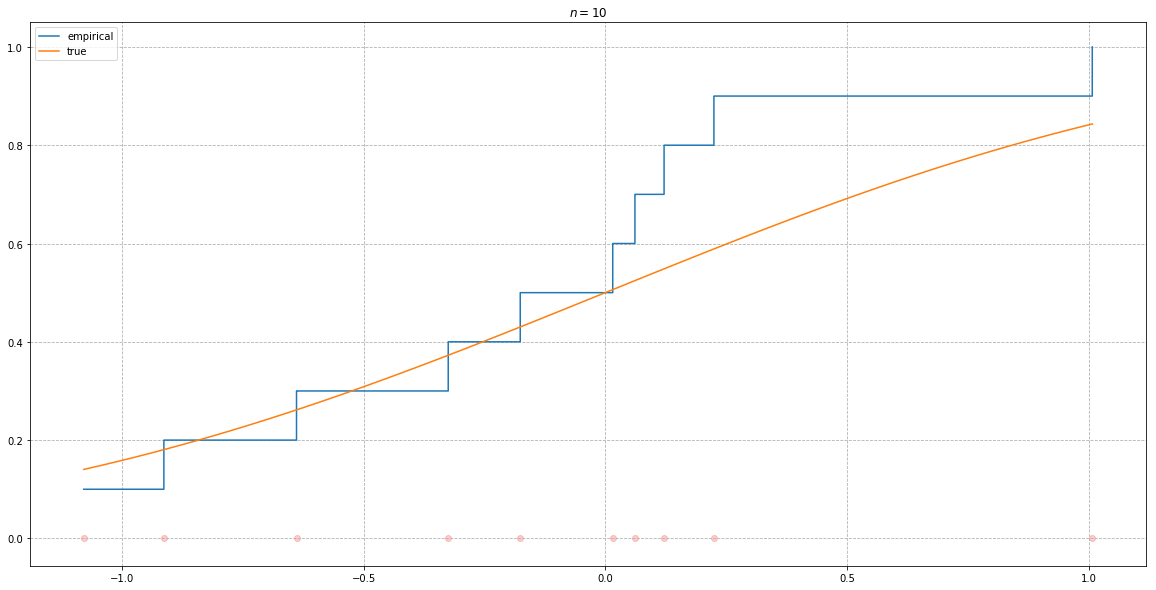

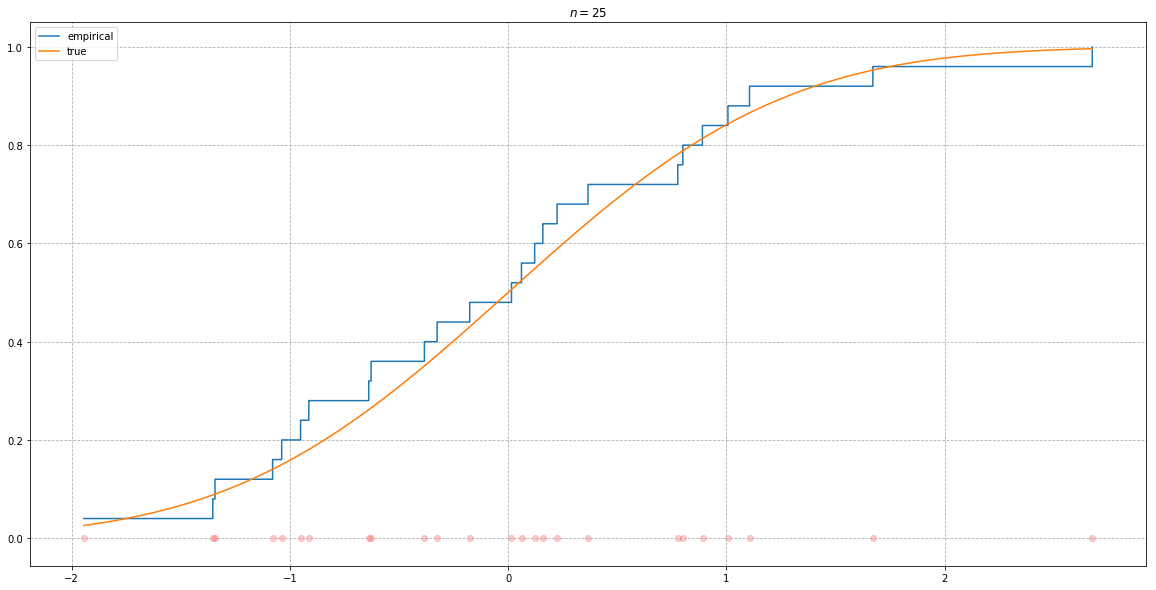

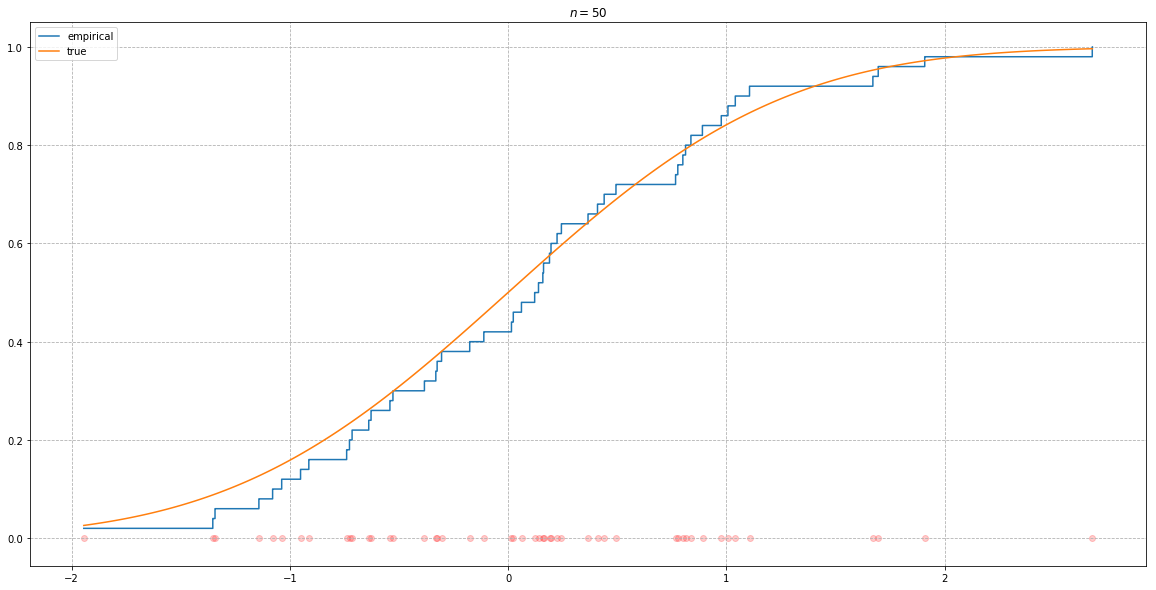

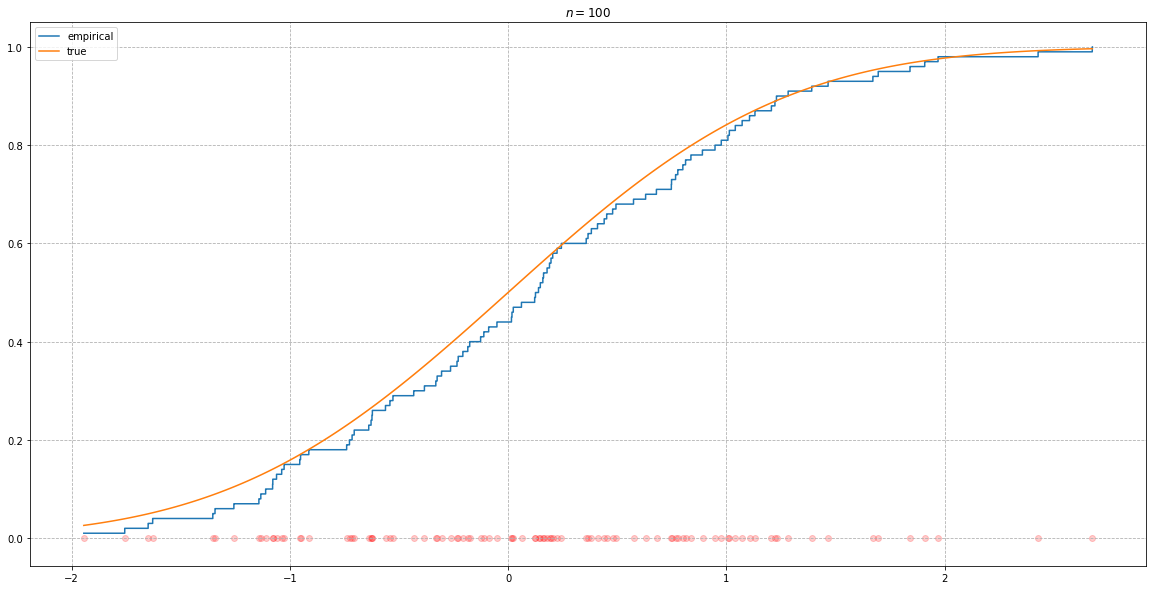

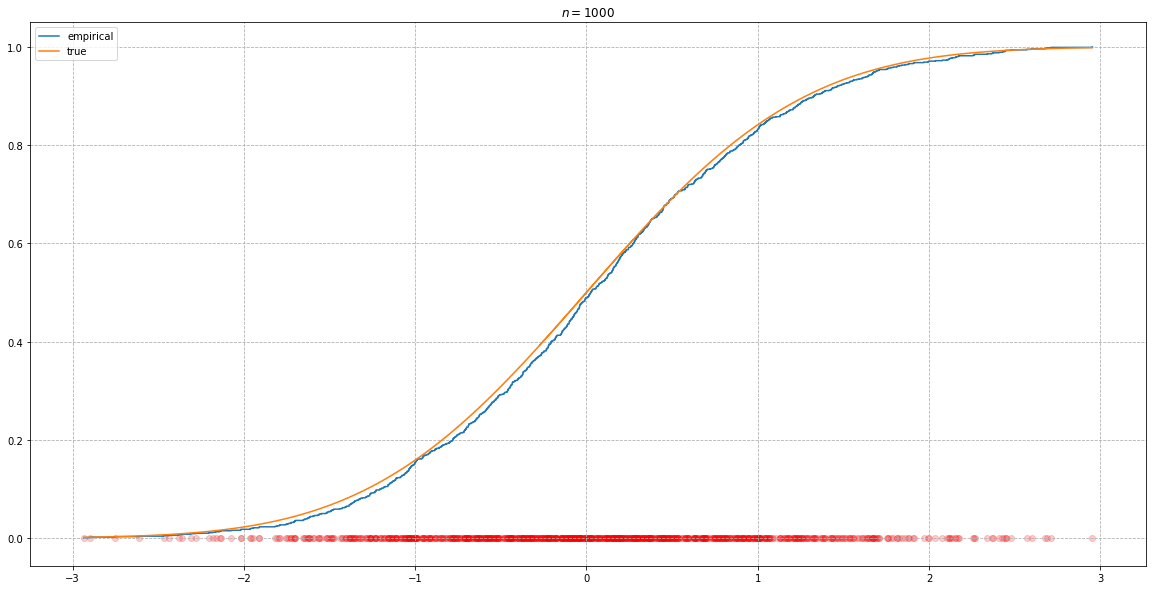

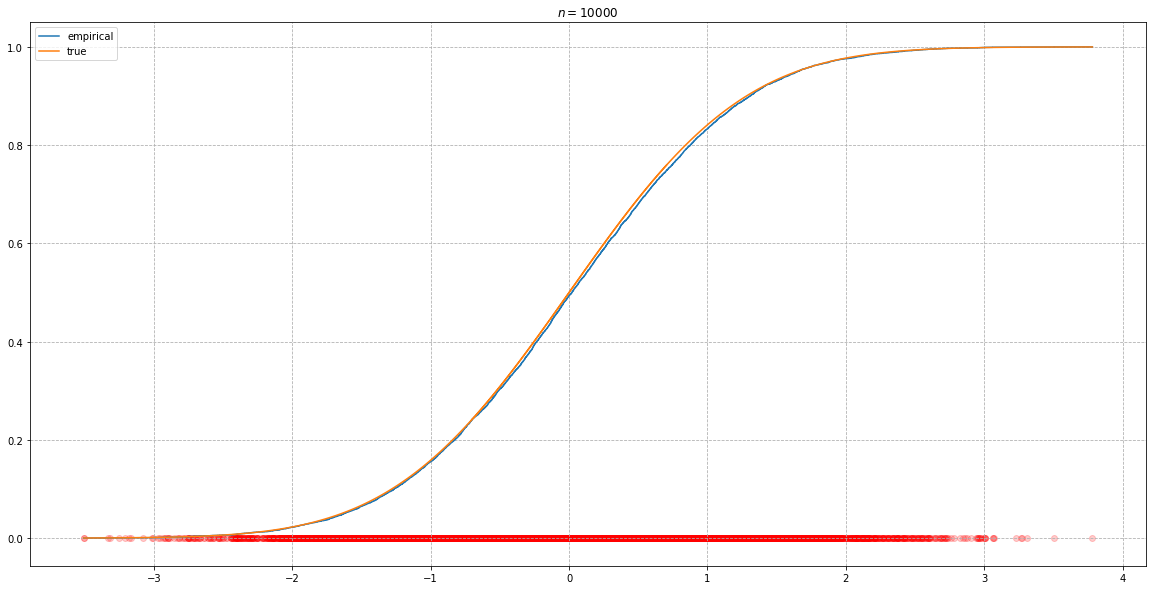

In [34]:
cdf = stats.norm.cdf

for n in [10, 25, 50, 100, 1000, N]:
    plt.figure(figsize=(20, 10))
    plt.title("$n=$"+str(n))
    ecdf_x = np.linspace(observations[:n].min(), observations[:n].max(), num=N)
    cdf_x = np.linspace(observations[:n].min(), observations[:n].max(), num=N)
    ecdf_y, cdf_y = ecdf_n[n-1](ecdf_x), cdf(cdf_x)
    plt.step(ecdf_x, ecdf_y, label="empirical")
    plt.step(cdf_x, cdf_y, label="true")
    plt.scatter(observations[:n], np.zeros(n), alpha=0.2, color = 'r', linewidths=1)
    plt.grid(ls='--')
    plt.legend()
    plt.show()

### Посчитаем точное значение $$ D_n = \sup_{x\in\mathbb{R}}|\hat{F}_n(x) - F(x)| $$

In [0]:
from scipy import optimize


lambda_arg_D_n = lambda n: optimize.minimize_scalar(
  lambda x: -abs(ecdf_n[n](x) - cdf(x))
).x
arg_D_n = gen_evaluation_by_n(N, ecdf_n, lambda_arg_D_n)

D_n = gen_evaluation_by_n(N, arg_D_n,
                         lambda n: abs(ecdf_n[n](arg_D_n[n]) - cdf(arg_D_n[n])))

sqrt_D_n = gen_evaluation_by_n(N, D_n, lambda n: ((n+1)**0.5) * D_n[n])

### Построим график зависимости статистик $D_n$ и $\sqrt{n}\cdot D_n$ от $n$

In [36]:
D_n

array([0.58892564, 0.41107435, 0.41107435, ..., 0.01322488, 0.01318515,
       0.01138793])

In [37]:
sqrt_D_n

array([0.58892564, 0.58134693, 0.71200167, ..., 1.32235596, 1.3184495 ,
       1.13879294])

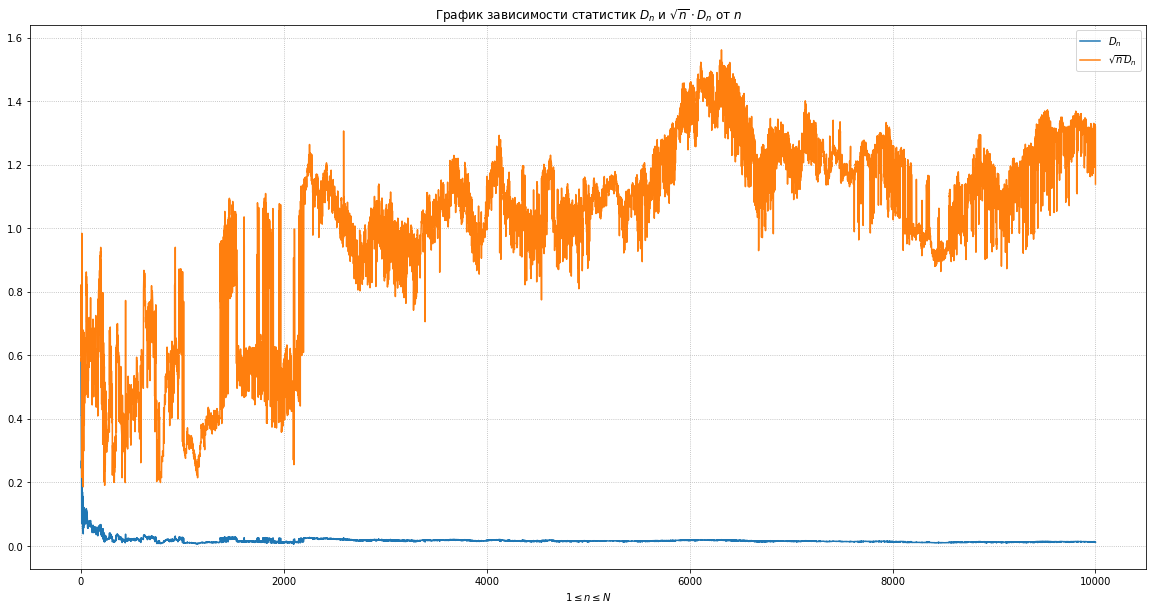

In [38]:
plt.figure(figsize=(20, 10))
plt.title("График зависимости статистик $D_n$ и $\sqrt{n} \cdot D_n$ от $n$")
plt.xlabel('$1\leq n \leq N$')
plt.plot(np.linspace(0, N, N), D_n, label="$D_n$")
plt.plot(np.linspace(0, N, N), sqrt_D_n, label="$\sqrt{n}D_n$")
plt.grid(ls=':')
plt.legend()
plt.show()

# Вывод к четвертому заданию

Из набора графиков эмпирической функции распределения видно, что при увеличении размера выборки $ecdf$ стремится к истинной $cdf$.  
График зависимости статистик $D_n$ и $\sqrt{n} \cdot D_n$ от $n$ показывает, что $D_n \to 0$ при $n \to \infty$. Это тоже явным образом показывает то, что с ростом $n$ эмпирическая функция распределения стремится к обычной функции распределения, в силу определения $D_n$.
